https://www.kaggle.com/c/store-sales-time-series-forecasting/overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams

In [2]:
train = pd.read_csv('train.csv',index_col='id')
hol_events = pd.read_csv('holidays_events.csv')
oil = pd.read_csv('oil.csv')
stores = pd.read_csv('stores.csv',index_col='store_nbr')
transactions = pd.read_csv('transactions.csv')

In [3]:
train

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [4]:
train['date'] = pd.to_datetime(train['date'])
train.sort_values(by='date',ascending=True,ignore_index=True,inplace=True)
train

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,42,CELEBRATION,0.000,0
2,2013-01-01,42,BREAD/BAKERY,0.000,0
3,2013-01-01,42,BOOKS,0.000,0
4,2013-01-01,42,BEVERAGES,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,25,PET SUPPLIES,3.000,0
3000884,2017-08-15,25,PERSONAL CARE,93.000,8
3000885,2017-08-15,25,MEATS,180.107,0
3000886,2017-08-15,26,BEAUTY,0.000,0


In [5]:
family_set = set(train['family'])
family_dict = {name : num for (name,num) in zip(family_set,range(1,len(family_set)+1))}
family_dict

{'BOOKS': 1,
 'PERSONAL CARE': 2,
 'PREPARED FOODS': 3,
 'FROZEN FOODS': 4,
 'BREAD/BAKERY': 5,
 'GROCERY II': 6,
 'PRODUCE': 7,
 'PET SUPPLIES': 8,
 'LADIESWEAR': 9,
 'GROCERY I': 10,
 'LINGERIE': 11,
 'DAIRY': 12,
 'MAGAZINES': 13,
 'LAWN AND GARDEN': 14,
 'BEVERAGES': 15,
 'HARDWARE': 16,
 'POULTRY': 17,
 'CELEBRATION': 18,
 'SCHOOL AND OFFICE SUPPLIES': 19,
 'HOME AND KITCHEN I': 20,
 'PLAYERS AND ELECTRONICS': 21,
 'HOME APPLIANCES': 22,
 'HOME CARE': 23,
 'AUTOMOTIVE': 24,
 'BABY CARE': 25,
 'SEAFOOD': 26,
 'CLEANING': 27,
 'DELI': 28,
 'EGGS': 29,
 'HOME AND KITCHEN II': 30,
 'BEAUTY': 31,
 'MEATS': 32,
 'LIQUOR,WINE,BEER': 33}

In [6]:
train['family'] = train['family'].apply(lambda x : family_dict[x]).astype(np.uint8)
train

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,24,0.000,0
1,2013-01-01,42,18,0.000,0
2,2013-01-01,42,5,0.000,0
3,2013-01-01,42,1,0.000,0
4,2013-01-01,42,15,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,25,8,3.000,0
3000884,2017-08-15,25,2,93.000,8
3000885,2017-08-15,25,32,180.107,0
3000886,2017-08-15,26,31,0.000,0


In [7]:
train.describe()

,store_nbr,family,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,2.750000e+01,1.700000e+01,3.577757e+02,2.602770e+00
std,1.558579e+01,9.521906e+00,1.101998e+03,1.221888e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,9.000000e+00,0.000000e+00,0.000000e+00
50%,2.750000e+01,1.700000e+01,1.100000e+01,0.000000e+00
75%,4.100000e+01,2.500000e+01,1.958473e+02,0.000000e+00
max,5.400000e+01,3.300000e+01,1.247170e+05,7.410000e+02


In [8]:
train['onpromotion'] = train['onpromotion'].astype(np.uint16)

In [9]:
train

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,24,0.000,0
1,2013-01-01,42,18,0.000,0
2,2013-01-01,42,5,0.000,0
3,2013-01-01,42,1,0.000,0
4,2013-01-01,42,15,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,25,8,3.000,0
3000884,2017-08-15,25,2,93.000,8
3000885,2017-08-15,25,32,180.107,0
3000886,2017-08-15,26,31,0.000,0


In [10]:
hol_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [11]:
hol_events['date'] = pd.to_datetime(hol_events['date'])

In [12]:
hol_events_set = set(hol_events['type'])

In [13]:
hol_type_dict = {name : num for (name,num) in zip(hol_events_set, range(1,len(hol_events_set)+1))}
hol_type_dict

{'Work Day': 1,
 'Holiday': 2,
 'Bridge': 3,
 'Additional': 4,
 'Transfer': 5,
 'Event': 6}

In [14]:
hol_events['type'] = hol_events['type'].apply(lambda x : hol_type_dict[x]).astype(np.uint8)

In [15]:
locale_set = set(hol_events['locale'])
locale_set

{'Local', 'National', 'Regional'}

In [16]:
locale_dict = {'Local' : 1, 'National' : 2, 'Regional' : 3}

In [17]:
hol_events['locale'] = hol_events['locale'].apply(lambda x : locale_dict[x]).astype(np.uint8)

In [18]:
locale_name_set = set(hol_events['locale_name'])
locale_name_set

{'Ambato',
 'Cayambe',
 'Cotopaxi',
 'Cuenca',
 'Ecuador',
 'El Carmen',
 'Esmeraldas',
 'Guaranda',
 'Guayaquil',
 'Ibarra',
 'Imbabura',
 'Latacunga',
 'Libertad',
 'Loja',
 'Machala',
 'Manta',
 'Puyo',
 'Quevedo',
 'Quito',
 'Riobamba',
 'Salinas',
 'Santa Elena',
 'Santo Domingo',
 'Santo Domingo de los Tsachilas'}

In [19]:
locale_name_dict = {name:num for (name,num) in zip(locale_name_set,range(1,len(locale_name_set)+1))}
hol_events['locale_name'] = hol_events['locale_name'].apply(lambda x : locale_name_dict[x]).astype(np.uint8)

In [20]:
description_set = set(hol_events['description'])
description_set

{'Batalla de Pichincha',
 'Black Friday',
 'Cantonizacion de Cayambe',
 'Cantonizacion de El Carmen',
 'Cantonizacion de Guaranda',
 'Cantonizacion de Latacunga',
 'Cantonizacion de Libertad',
 'Cantonizacion de Quevedo',
 'Cantonizacion de Riobamba',
 'Cantonizacion de Salinas',
 'Cantonizacion del Puyo',
 'Carnaval',
 'Cyber Monday',
 'Dia de Difuntos',
 'Dia de la Madre',
 'Dia de la Madre-1',
 'Dia del Trabajo',
 'Fundacion de Ambato',
 'Fundacion de Cuenca',
 'Fundacion de Esmeraldas',
 'Fundacion de Guayaquil',
 'Fundacion de Guayaquil-1',
 'Fundacion de Ibarra',
 'Fundacion de Loja',
 'Fundacion de Machala',
 'Fundacion de Manta',
 'Fundacion de Quito',
 'Fundacion de Quito-1',
 'Fundacion de Riobamba',
 'Fundacion de Santo Domingo',
 'Inauguracion Mundial de futbol Brasil',
 'Independencia de Ambato',
 'Independencia de Cuenca',
 'Independencia de Guaranda',
 'Independencia de Guayaquil',
 'Independencia de Latacunga',
 'Mundial de futbol Brasil: Cuartos de Final',
 'Mundial de

In [21]:
description_dict = {name:num for (name,num) in zip(description_set, range(1,len(description_set)+1))}
hol_events['description'] = hol_events['description'].apply(lambda x : description_dict[x]).astype(np.uint8)

In [22]:
hol_events.columns

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

In [23]:
#hol_events['transferred'] = hol_events['transferred'].astype(bool)
hol_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,2,1,12,93,False
1,2012-04-01,2,3,11,44,False
2,2012-04-12,2,1,5,21,False
3,2012-04-14,2,1,20,84,False
4,2012-04-21,2,1,19,65,False
...,...,...,...,...,...,...
345,2017-12-22,4,2,15,68,False
346,2017-12-23,4,2,15,64,False
347,2017-12-24,4,2,15,99,False
348,2017-12-25,2,2,15,51,False


In [24]:
oil['date'] = pd.to_datetime(oil['date'])
oil.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [25]:
stores

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
6,Quito,Pichincha,D,13
7,Quito,Pichincha,D,8
8,Quito,Pichincha,D,8
9,Quito,Pichincha,B,6


In [26]:
city_set = set(stores['city'])
city_set

{'Ambato',
 'Babahoyo',
 'Cayambe',
 'Cuenca',
 'Daule',
 'El Carmen',
 'Esmeraldas',
 'Guaranda',
 'Guayaquil',
 'Ibarra',
 'Latacunga',
 'Libertad',
 'Loja',
 'Machala',
 'Manta',
 'Playas',
 'Puyo',
 'Quevedo',
 'Quito',
 'Riobamba',
 'Salinas',
 'Santo Domingo'}

In [27]:
city_dict = {name:num for (name,num) in zip(city_set, range(1,len(stores)+1))}
city_dict

{'Quevedo': 1,
 'Guayaquil': 2,
 'Daule': 3,
 'Ambato': 4,
 'Cayambe': 5,
 'Playas': 6,
 'Cuenca': 7,
 'Latacunga': 8,
 'El Carmen': 9,
 'Machala': 10,
 'Quito': 11,
 'Puyo': 12,
 'Manta': 13,
 'Guaranda': 14,
 'Esmeraldas': 15,
 'Santo Domingo': 16,
 'Riobamba': 17,
 'Libertad': 18,
 'Ibarra': 19,
 'Salinas': 20,
 'Loja': 21,
 'Babahoyo': 22}

In [28]:
stores['city'] = stores['city'].apply(lambda x : city_dict[x]).astype(np.uint8)

In [29]:
state_set = set(stores['state'])
state_set

{'Azuay',
 'Bolivar',
 'Chimborazo',
 'Cotopaxi',
 'El Oro',
 'Esmeraldas',
 'Guayas',
 'Imbabura',
 'Loja',
 'Los Rios',
 'Manabi',
 'Pastaza',
 'Pichincha',
 'Santa Elena',
 'Santo Domingo de los Tsachilas',
 'Tungurahua'}

In [30]:
state_dict = {name:num for (name,num) in zip(state_set, range(1,len(state_set)+1))}
stores['state'] = stores['state'].apply(lambda x : state_dict[x]).astype(np.uint8)

In [31]:
stores_type_set = set(stores['type'])
stores_type_set

{'A', 'B', 'C', 'D', 'E'}

In [32]:
stores_type_dict = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5}
stores['type'] = stores['type'].apply(lambda x : stores_type_dict[x]).astype(np.uint8)

In [33]:
transactions['date'] = pd.to_datetime(transactions['date'])

# EDA

In [34]:
'''
train = pd.read_csv('train.csv',index_col='id')
hol_events = pd.read_csv('holidays_events.csv')
oil = pd.read_csv('oil.csv')
stores = pd.read_csv('stores.csv',index_col='store_nbr')
transactions = pd.read_csv('transactions.csv')
'''

"\ntrain = pd.read_csv('train.csv',index_col='id')\nhol_events = pd.read_csv('holidays_events.csv')\noil = pd.read_csv('oil.csv')\nstores = pd.read_csv('stores.csv',index_col='store_nbr')\ntransactions = pd.read_csv('transactions.csv')\n"

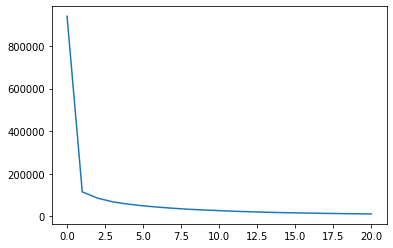

In [35]:
plt.plot(train['sales'].value_counts()[:20])

In [36]:
train.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

## Sales hists per shop

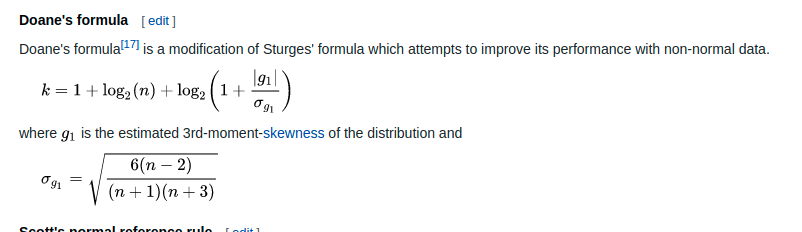

In [37]:
def doan_bins(data):
    n = len(data)
    g1 = data.skew()
    sigma_g1 = np.sqrt(6*(n-2)/((n+1)*(n+3)))
    return int(1 + np.log2(n) + np.log2(1+np.abs(g1)/sigma_g1))

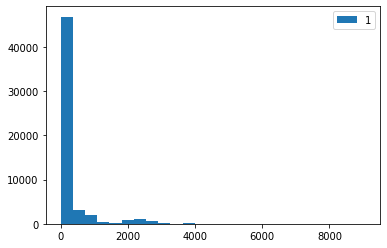

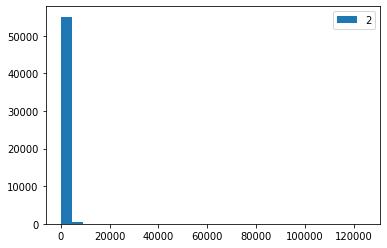

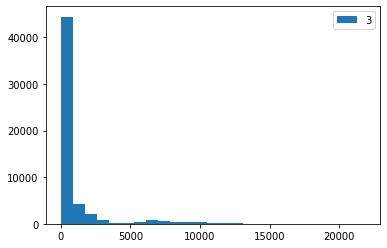

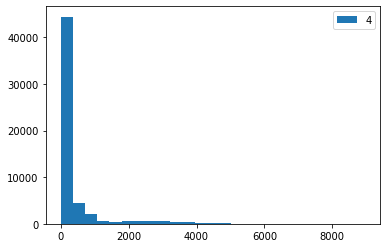

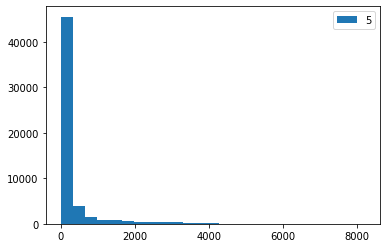

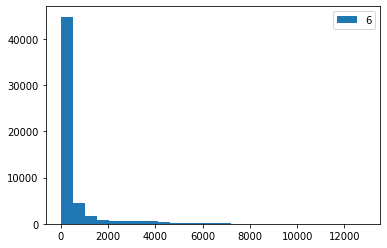

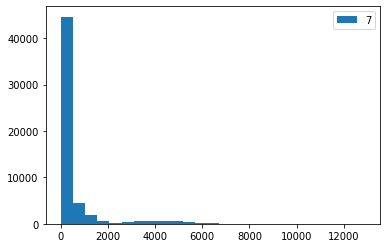

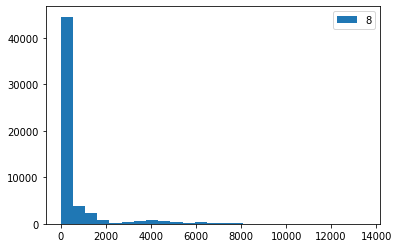

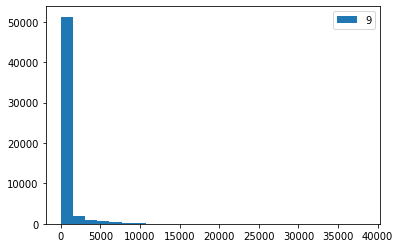

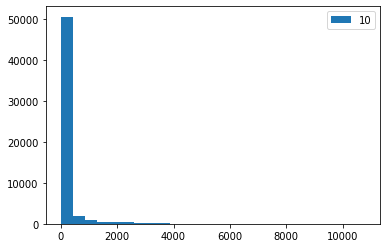

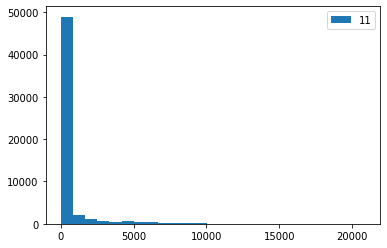

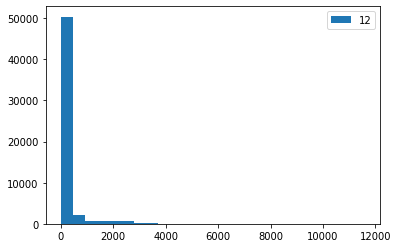

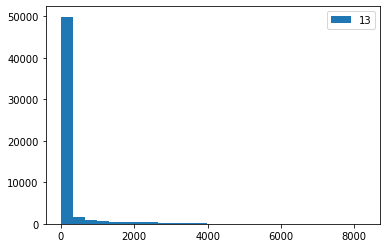

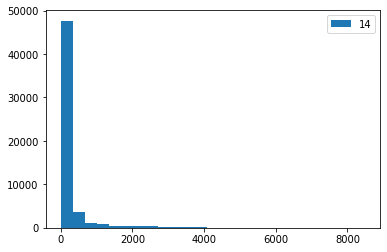

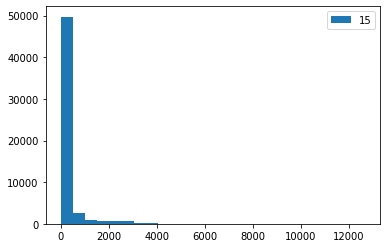

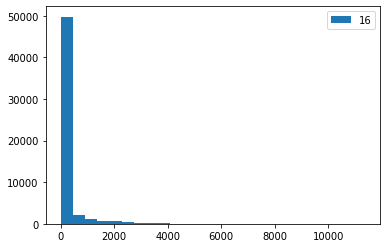

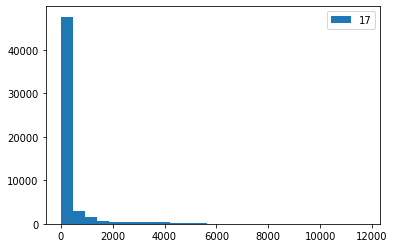

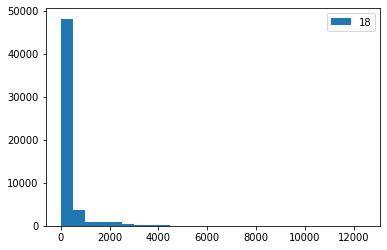

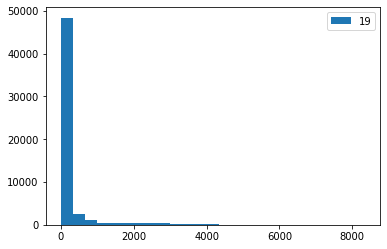

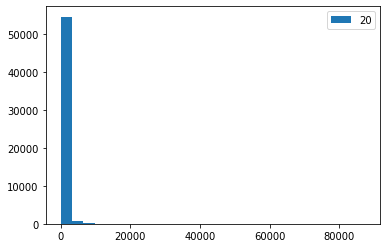

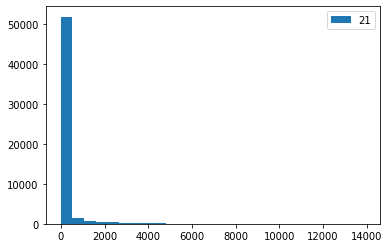

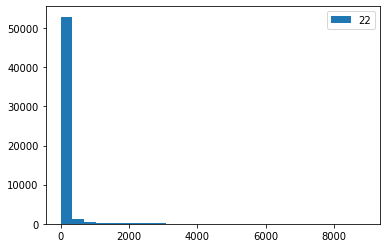

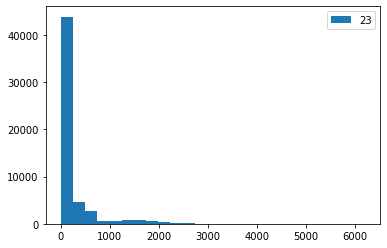

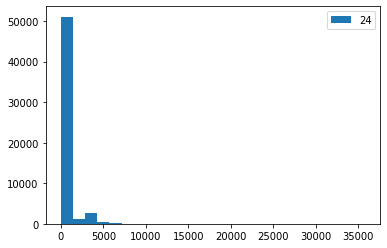

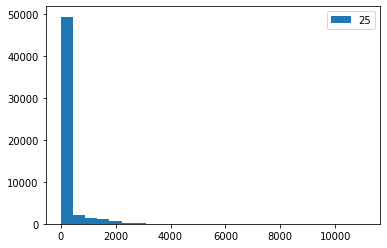

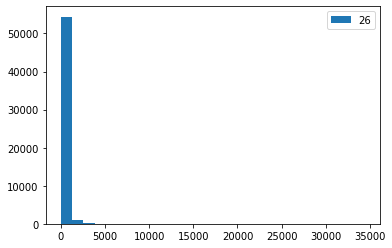

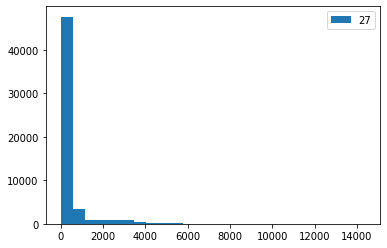

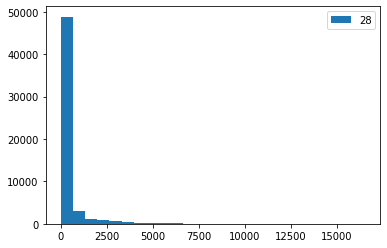

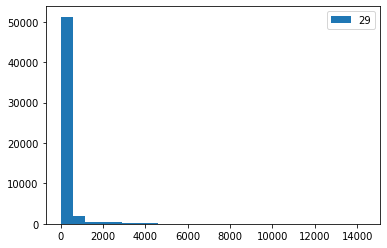

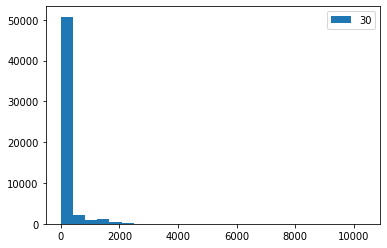

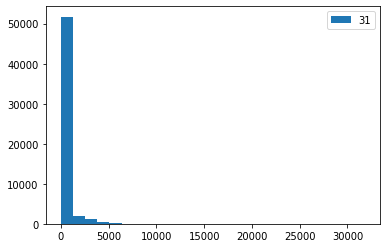

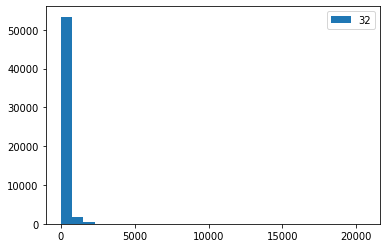

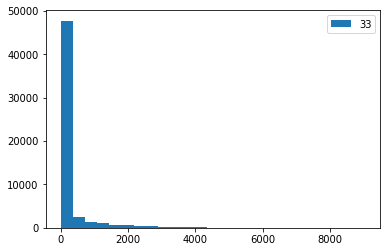

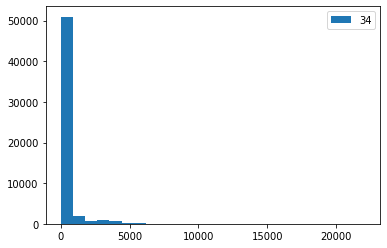

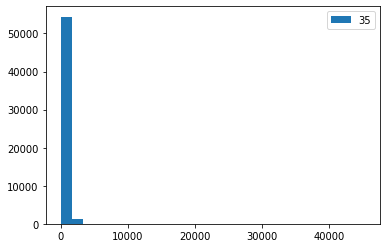

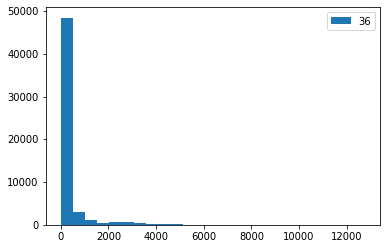

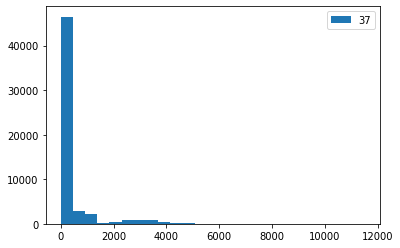

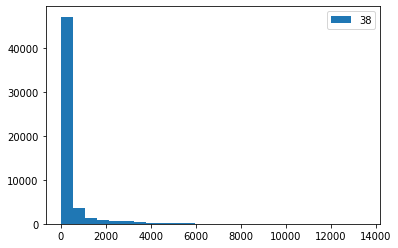

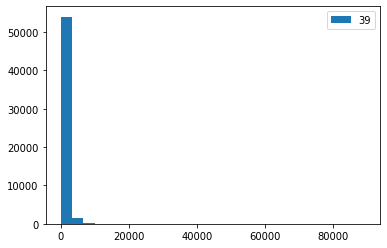

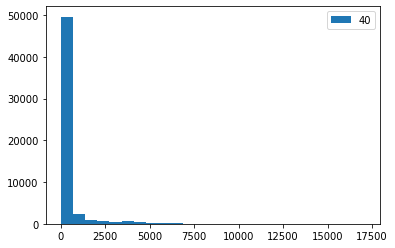

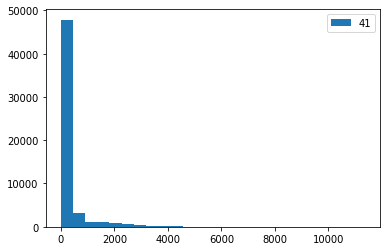

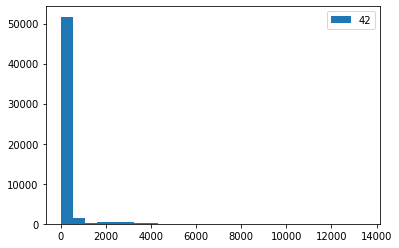

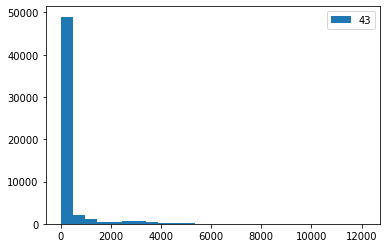

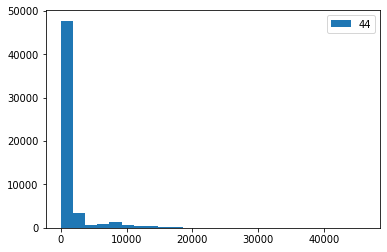

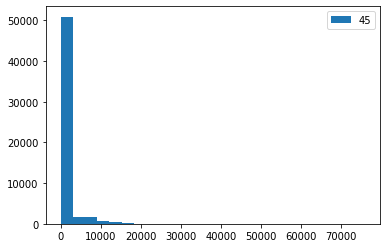

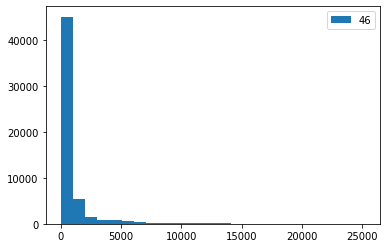

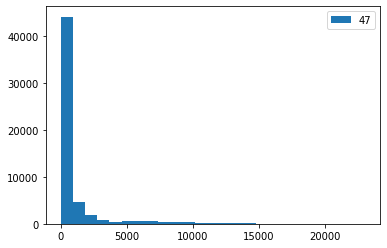

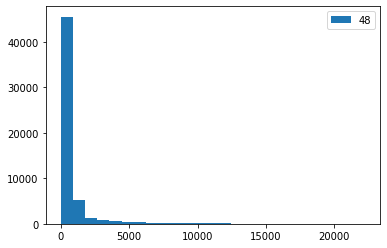

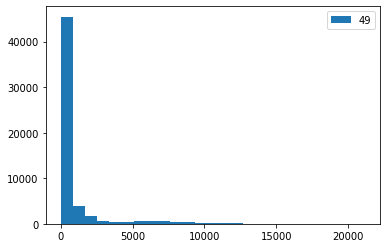

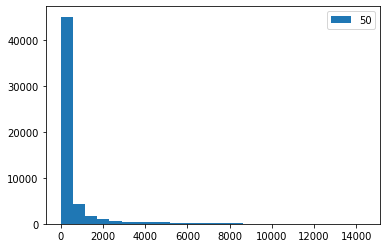

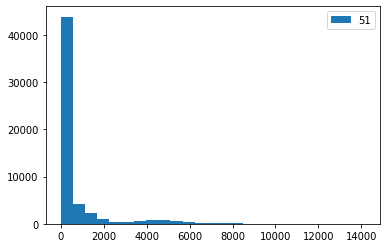

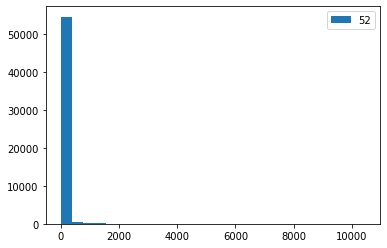

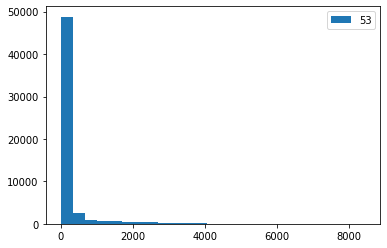

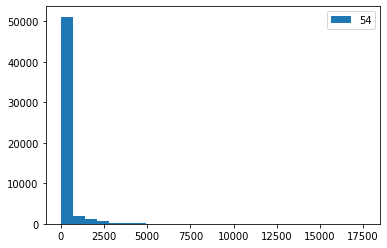

In [38]:
for index in stores.index:
    temp = train.loc[(train['store_nbr']==index),'sales']
    #temp = train.loc[(train['store_nbr']==index)&(train['sales'] != 0),'sales']
    #bins = int(1+3.322*np.log2(len(temp)))
    bins = doan_bins(temp)
    plt.hist(temp, bins=bins, label=index)
    plt.legend()
    plt.show()

# Sales hists per family

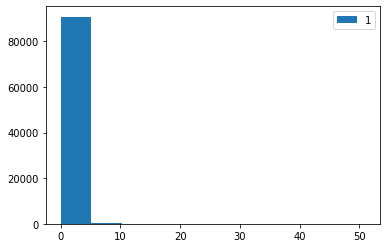

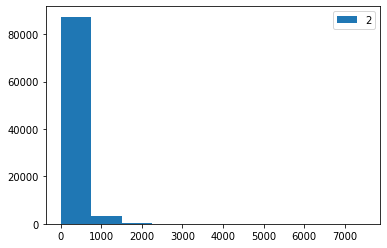

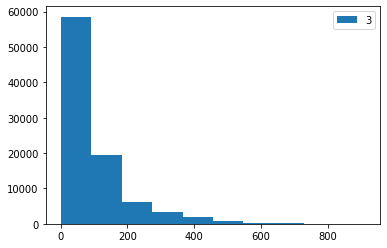

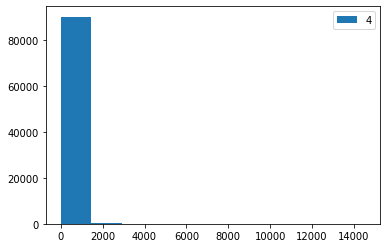

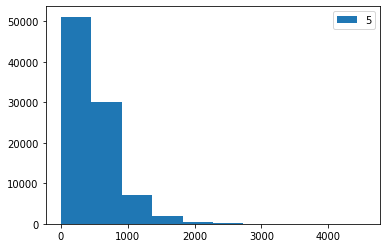

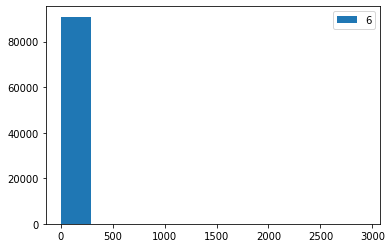

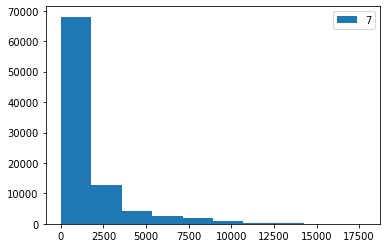

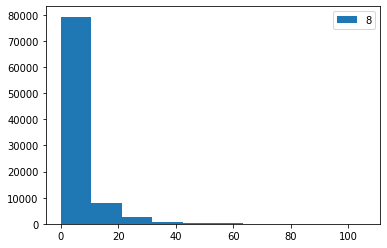

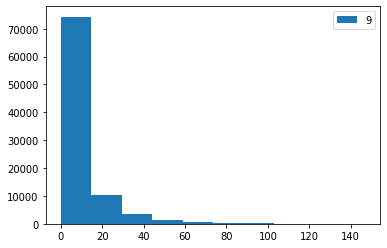

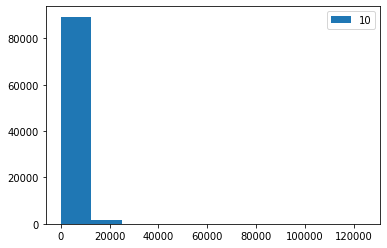

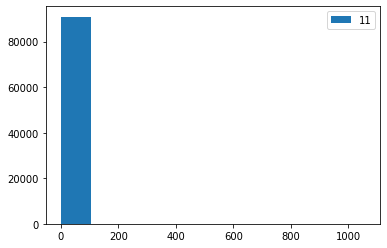

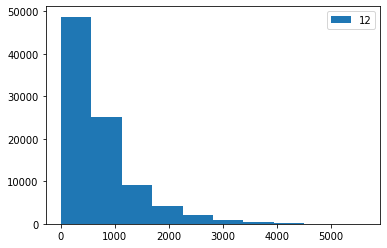

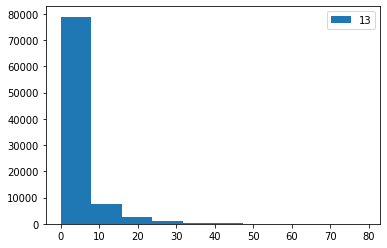

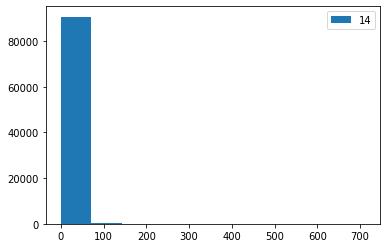

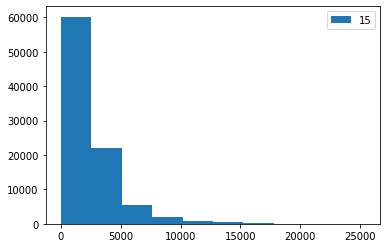

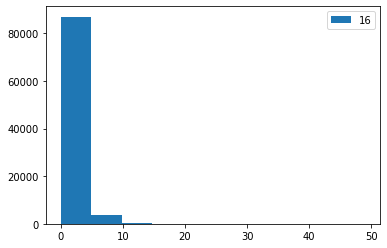

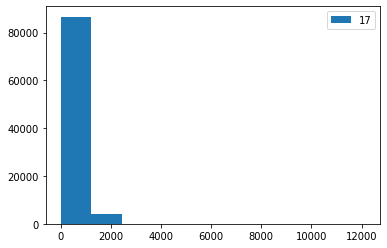

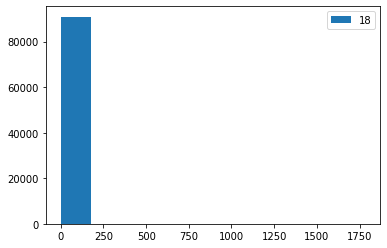

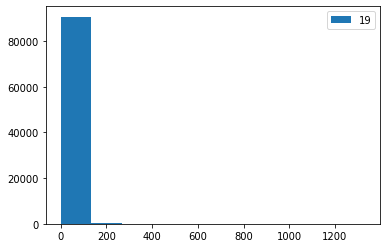

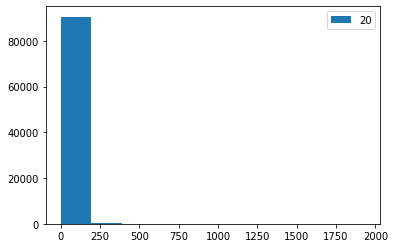

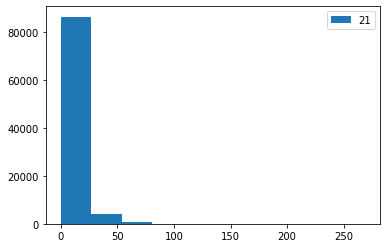

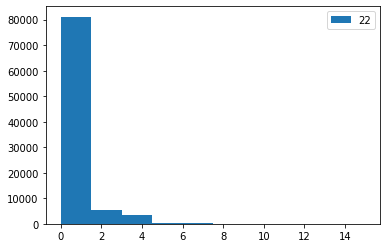

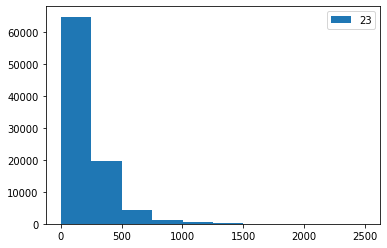

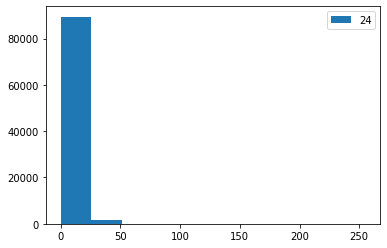

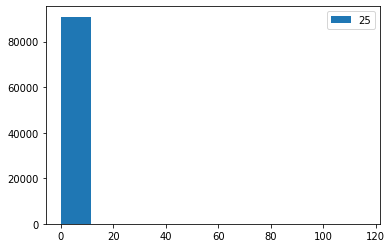

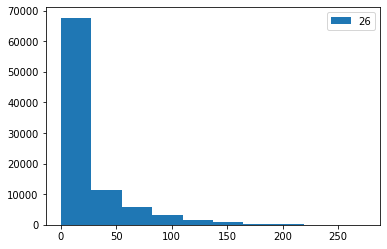

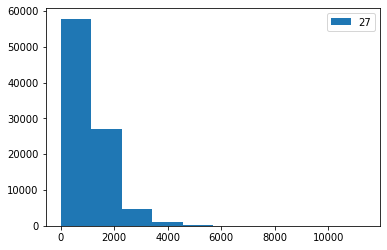

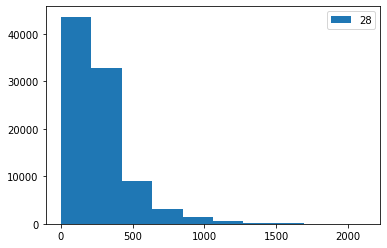

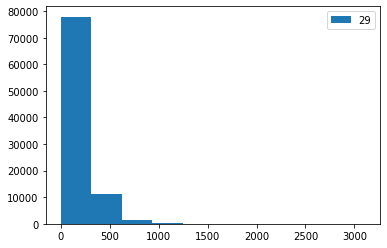

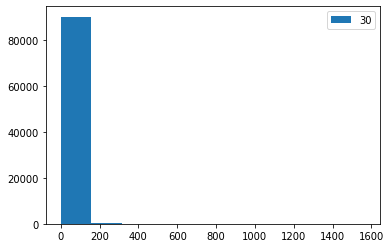

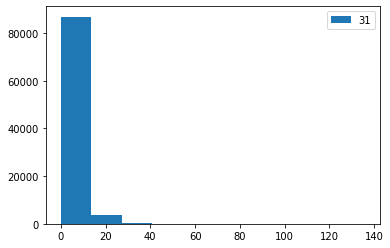

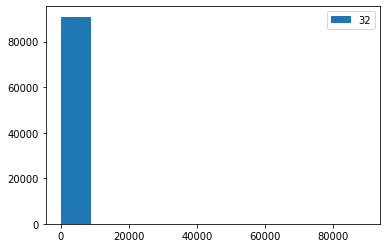

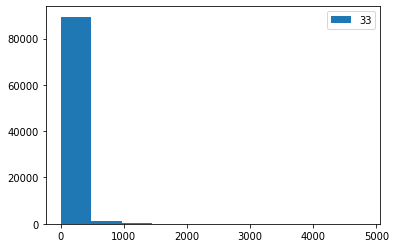

In [39]:
for index in family_dict.values():
    temp = train.loc[(train['family']==index),'sales']
    #bins = int(1+3.322*np.log2(len(temp)))
    bins = doan_bins(temp)
    #bins = 25
    plt.hist(temp, label=index)
    plt.legend()
    plt.show()

In [40]:
family_dict

{'BOOKS': 1,
 'PERSONAL CARE': 2,
 'PREPARED FOODS': 3,
 'FROZEN FOODS': 4,
 'BREAD/BAKERY': 5,
 'GROCERY II': 6,
 'PRODUCE': 7,
 'PET SUPPLIES': 8,
 'LADIESWEAR': 9,
 'GROCERY I': 10,
 'LINGERIE': 11,
 'DAIRY': 12,
 'MAGAZINES': 13,
 'LAWN AND GARDEN': 14,
 'BEVERAGES': 15,
 'HARDWARE': 16,
 'POULTRY': 17,
 'CELEBRATION': 18,
 'SCHOOL AND OFFICE SUPPLIES': 19,
 'HOME AND KITCHEN I': 20,
 'PLAYERS AND ELECTRONICS': 21,
 'HOME APPLIANCES': 22,
 'HOME CARE': 23,
 'AUTOMOTIVE': 24,
 'BABY CARE': 25,
 'SEAFOOD': 26,
 'CLEANING': 27,
 'DELI': 28,
 'EGGS': 29,
 'HOME AND KITCHEN II': 30,
 'BEAUTY': 31,
 'MEATS': 32,
 'LIQUOR,WINE,BEER': 33}

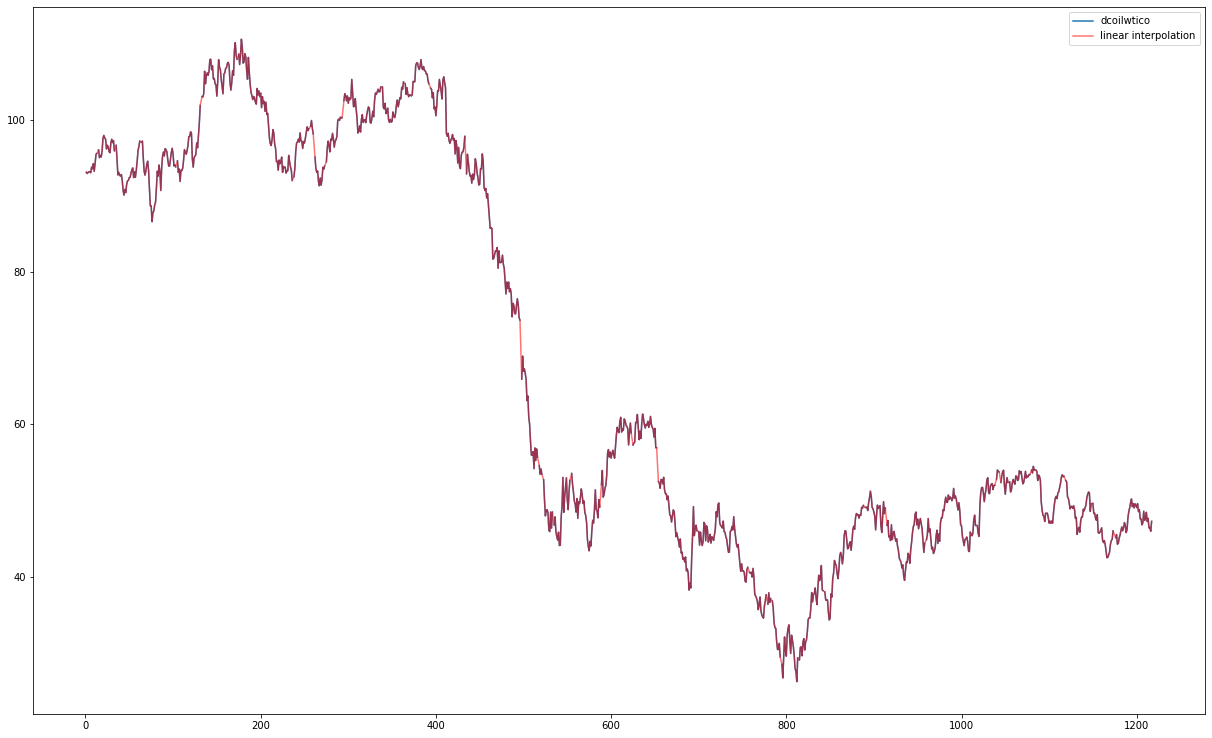

In [41]:
rcParams['figure.figsize'] = 21,13
plt.plot(oil['dcoilwtico'], label='dcoilwtico')
temp = oil['dcoilwtico'].interpolate(method='linear')
plt.plot(temp, alpha=0.55, color='r',label='linear interpolation')
plt.legend()
plt.show()

temp = train.groupby(['family','date'])['sales'].mean()
for name,key in family_dict.items():
    plt.plot(temp.loc[key],label=f'{name} : {key}')
    plt.legend()
    plt.show()

In [42]:
'''
train = pd.read_csv('train.csv',index_col='id')
hol_events = pd.read_csv('holidays_events.csv')
oil = pd.read_csv('oil.csv')
stores = pd.read_csv('stores.csv',index_col='store_nbr')
transactions = pd.read_csv('transactions.csv')
'''

"\ntrain = pd.read_csv('train.csv',index_col='id')\nhol_events = pd.read_csv('holidays_events.csv')\noil = pd.read_csv('oil.csv')\nstores = pd.read_csv('stores.csv',index_col='store_nbr')\ntransactions = pd.read_csv('transactions.csv')\n"

In [43]:
hol_events['type'].value_counts()

2    221
6     56
4     51
5     12
3      5
1      5
Name: type, dtype: int64

In [44]:
hol_type_dict

{'Work Day': 1,
 'Holiday': 2,
 'Bridge': 3,
 'Additional': 4,
 'Transfer': 5,
 'Event': 6}

In [45]:
hol_events['locale'].value_counts()

2    174
1    152
3     24
Name: locale, dtype: int64

In [46]:
locale_dict

{'Local': 1, 'National': 2, 'Regional': 3}

In [47]:
hol_events['transferred'].value_counts()

False    338
True      12
Name: transferred, dtype: int64

In [48]:
hol_events[hol_events['transferred']==True]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,2,2,15,29,True
72,2013-10-09,2,2,15,29,True
135,2014-10-09,2,2,15,29,True
255,2016-05-24,2,2,15,52,True
266,2016-07-25,2,1,2,15,True
268,2016-08-10,2,2,15,3,True
297,2017-01-01,2,2,15,101,True
303,2017-04-12,2,1,5,21,True
312,2017-05-24,2,2,15,52,True
324,2017-08-10,2,2,15,3,True


In [49]:
hol_events[hol_events['date'] == '2012-10-12']

,date,type,locale,locale_name,description,transferred
20,2012-10-12,5,2,15,59,False


In [50]:
description_dict['Independencia de Guayaquil']

29

In [51]:
hol_type_dict['Transfer']

5

In [52]:
hol_events[hol_events['type']==hol_type_dict['Transfer']]

,date,type,locale,locale_name,description,transferred
20,2012-10-12,5,2,15,59,False
73,2013-10-11,5,2,15,59,False
136,2014-10-10,5,2,15,59,False
256,2016-05-27,5,2,15,103,False
265,2016-07-24,5,1,2,94,False
269,2016-08-12,5,2,15,5,False
298,2017-01-02,5,2,15,78,False
304,2017-04-13,5,1,5,21,False
313,2017-05-26,5,2,15,103,False
325,2017-08-11,5,2,15,5,False


In [53]:
temp = train['date']
train['day'] = temp.dt.day.astype(np.uint8)
train['weekday'] = temp.dt.weekday.astype(np.uint8)
train['week'] = temp.dt.week.astype(np.uint8)
train['month'] = temp.dt.month.astype(np.uint8)
train['year'] = temp.dt.year.astype(np.uint16)

/tmp/ipykernel_31685/3676139661.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train['week'] = temp.dt.week.astype(np.uint8)


In [54]:
grouped = train.groupby(['year','month'])['sales']
#temp

In [55]:
temp1 = grouped.mean()
temp2 = grouped.median()

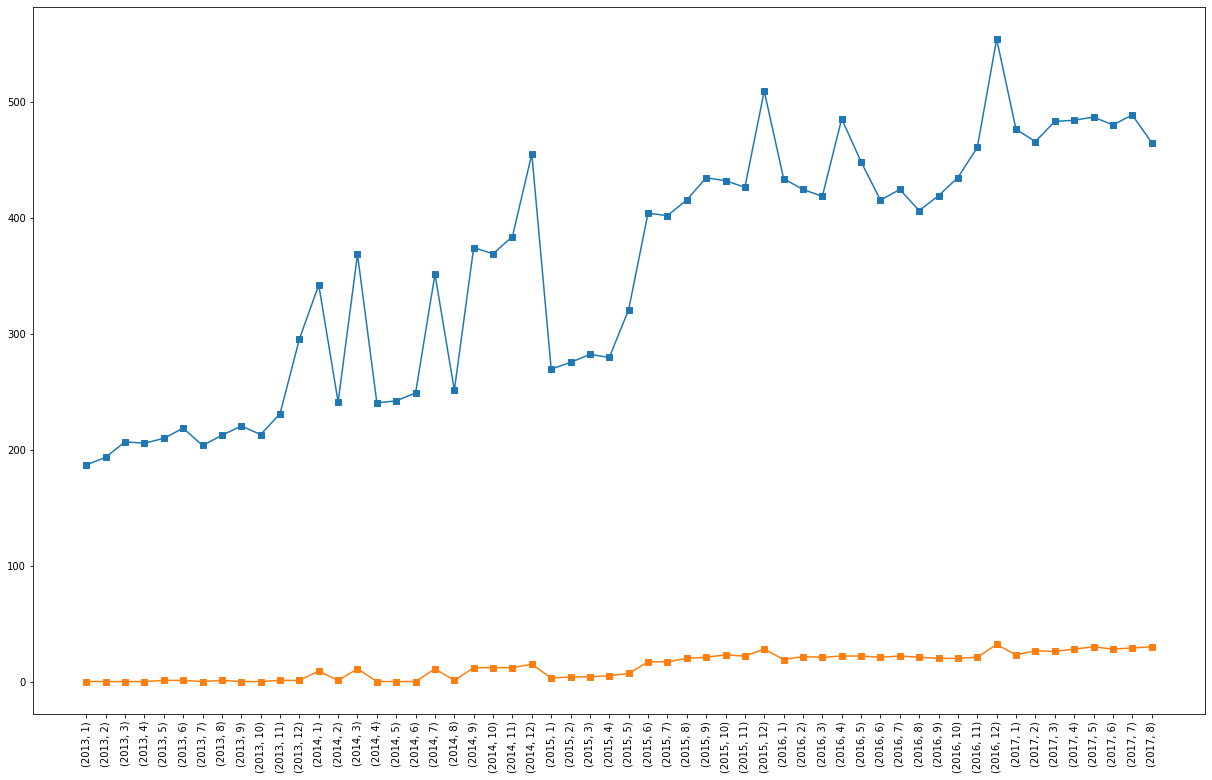

In [56]:
plt.plot(list(map(str,temp1.index)),temp1,marker='s')
plt.plot(list(map(str,temp2.index)),temp2,marker='s')
plt.xticks(rotation=90)
plt.show()

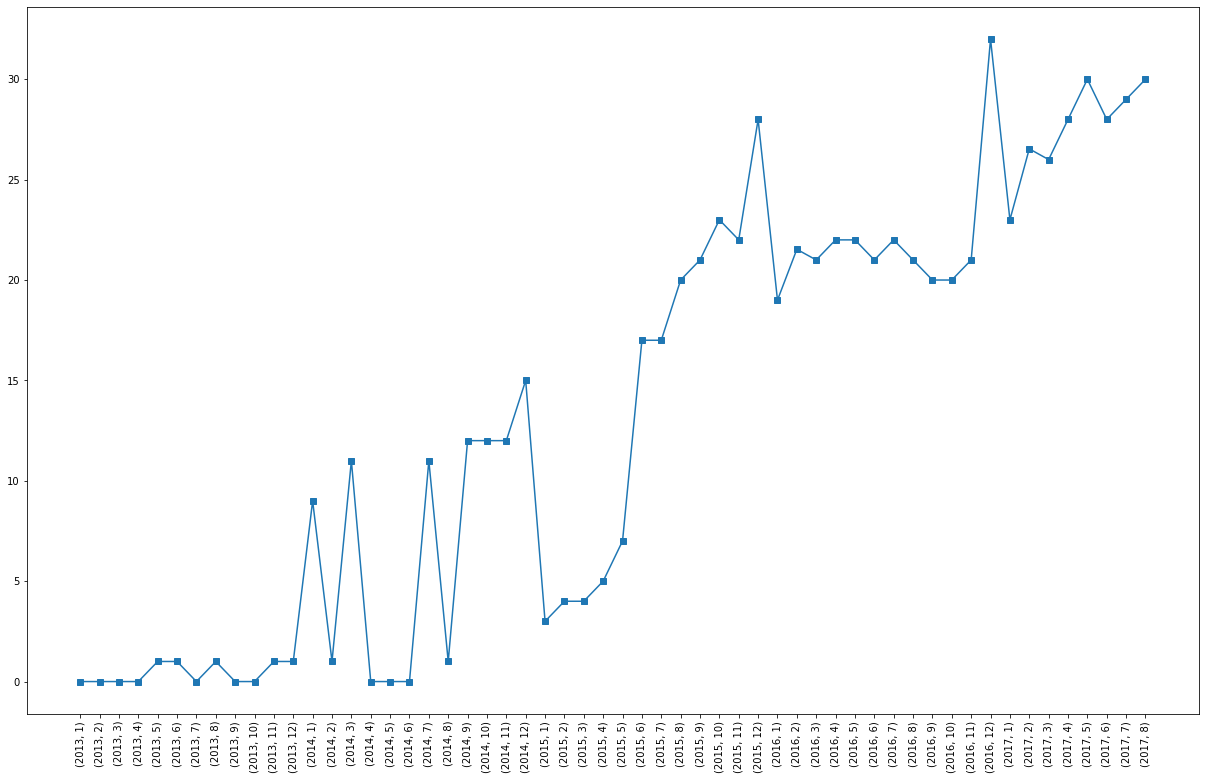

In [57]:
plt.plot(list(map(str,temp2.index)),temp2,marker='s')
plt.xticks(rotation=90)
plt.show()

In [58]:
train

,date,store_nbr,family,sales,onpromotion,day,weekday,week,month,year
0,2013-01-01,1,24,0.000,0,1,1,1,1,2013
1,2013-01-01,42,18,0.000,0,1,1,1,1,2013
2,2013-01-01,42,5,0.000,0,1,1,1,1,2013
3,2013-01-01,42,1,0.000,0,1,1,1,1,2013
4,2013-01-01,42,15,0.000,0,1,1,1,1,2013
...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,25,8,3.000,0,15,1,33,8,2017
3000884,2017-08-15,25,2,93.000,8,15,1,33,8,2017
3000885,2017-08-15,25,32,180.107,0,15,1,33,8,2017
3000886,2017-08-15,26,31,0.000,0,15,1,33,8,2017


In [59]:
hol_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,2,1,12,93,False
1,2012-04-01,2,3,11,44,False
2,2012-04-12,2,1,5,21,False
3,2012-04-14,2,1,20,84,False
4,2012-04-21,2,1,19,65,False
...,...,...,...,...,...,...
345,2017-12-22,4,2,15,68,False
346,2017-12-23,4,2,15,64,False
347,2017-12-24,4,2,15,99,False
348,2017-12-25,2,2,15,51,False


In [60]:
hol_events['month'] = hol_events['date'].dt.month.astype(np.uint8)

In [61]:
grouped = train.groupby(['store_nbr','year','month'])['sales'].mean()

for index in set(train['store_nbr']):
    temp = grouped[(index,2016)]
    plt.plot(list(map(str,temp.index)),temp,label=index,marker='s')
    #plt.xticks(rotation=90)
    plt.legend()
    plt.show()

In [62]:
stores

,city,state,type,cluster
store_nbr,,,,
1,11,14,4,13
2,11,14,4,13
3,11,14,4,8
4,11,14,4,9
5,16,10,4,4
6,11,14,4,13
7,11,14,4,8
8,11,14,4,8
9,11,14,2,6


/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='cluster'>

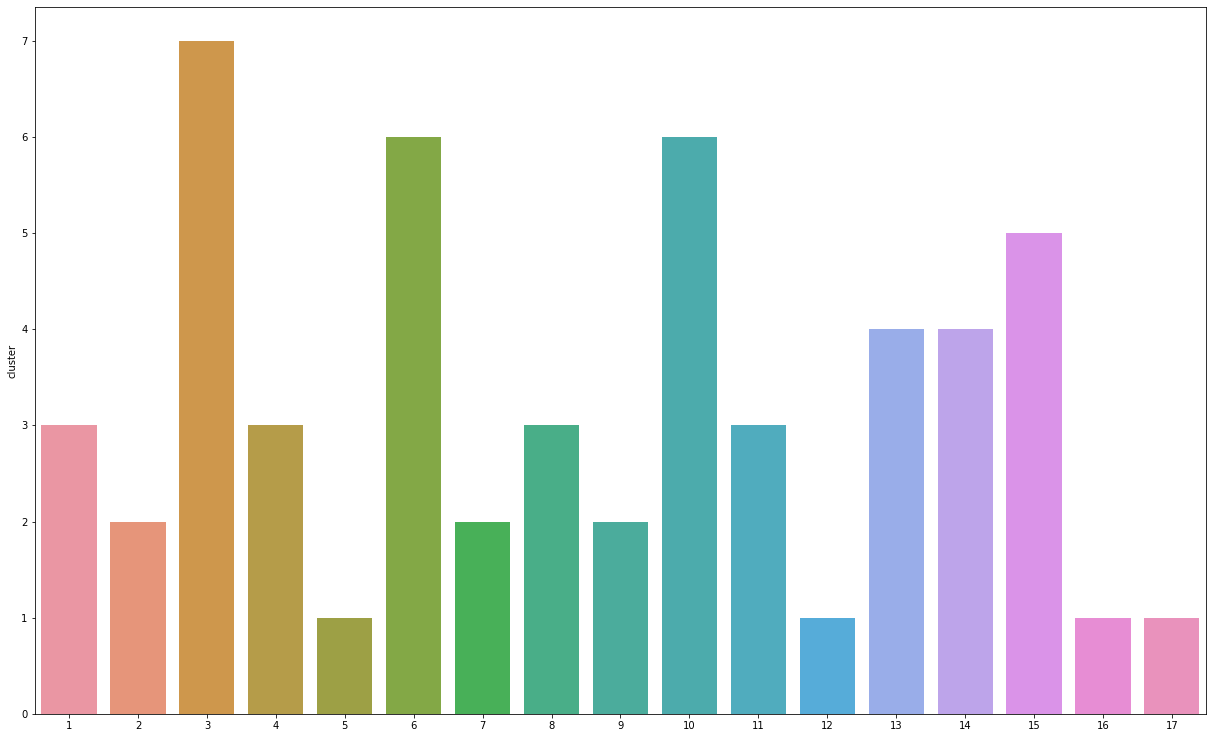

In [63]:
sns.barplot(stores.cluster.value_counts().index, stores.cluster.value_counts())

In [64]:
train['sales'].describe()

count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64

In [65]:
def boxplot_outliers(train, col, a, b, p1, p3):
    
    q1, q3 = train[col].quantile(p1), train[col].quantile(p3)
    iqr = q3 - q1
    lower_tail = q1 - a*iqr
    upper_tail = q3 + b*iqr

    temp = train.loc[(train['sales'] <= lower_tail) | (train['sales'] >= upper_tail)]
    
    return temp

In [66]:
temp = boxplot_outliers(train, col='sales', a=1.5, b=1.5, p1=0.2, p3=0.8)
temp

,date,store_nbr,family,sales,onpromotion,day,weekday,week,month,year
1746,2013-01-01,25,15,810.000,0,1,1,1,1,2013
1842,2013-01-02,40,10,2473.000,0,2,2,1,1,2013
1847,2013-01-02,40,27,889.000,0,2,2,1,1,2013
1865,2013-01-02,41,10,2211.000,0,2,2,1,1,2013
1870,2013-01-02,41,27,786.000,0,2,2,1,1,2013
...,...,...,...,...,...,...,...,...,...,...
3000850,2017-08-15,25,15,1636.000,8,15,1,33,8,2017
3000856,2017-08-15,24,7,3651.333,10,15,1,33,8,2017
3000864,2017-08-15,26,10,1100.000,22,15,1,33,8,2017
3000874,2017-08-15,26,15,762.000,10,15,1,33,8,2017


/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='month'>

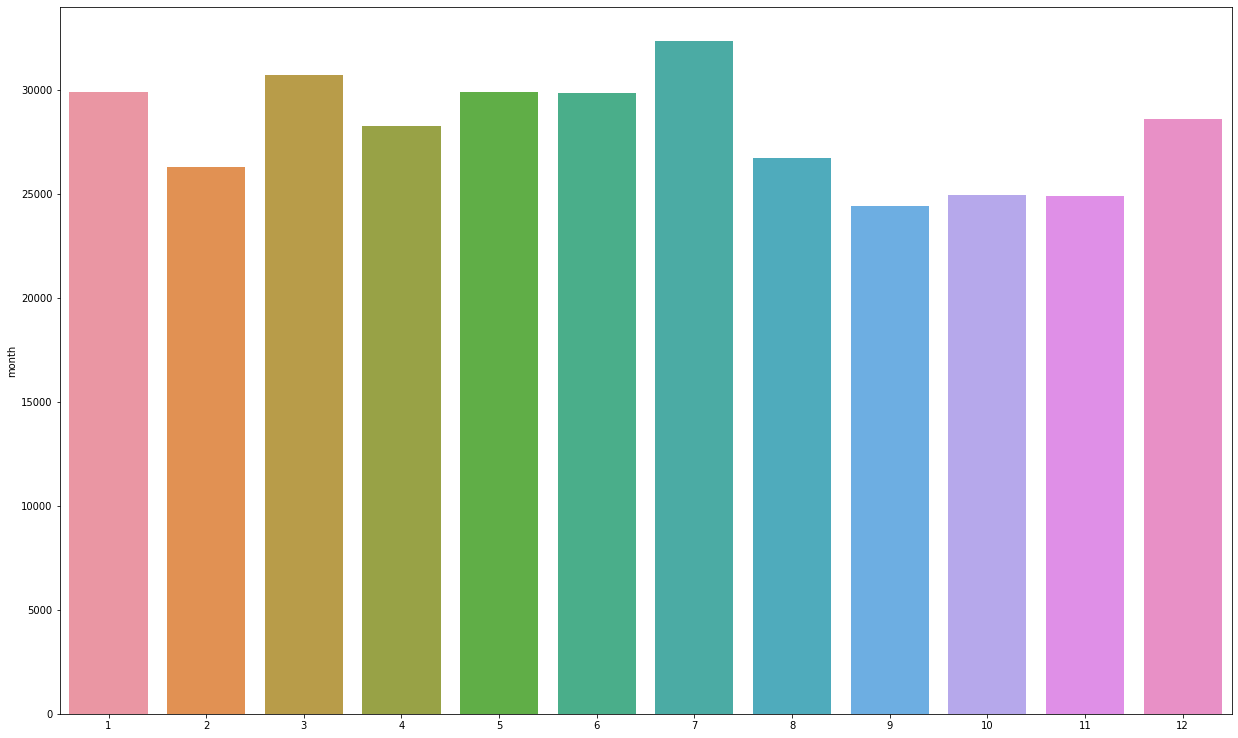

In [67]:
sns.barplot(temp['month'].value_counts().index, temp['month'].value_counts())

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='year'>

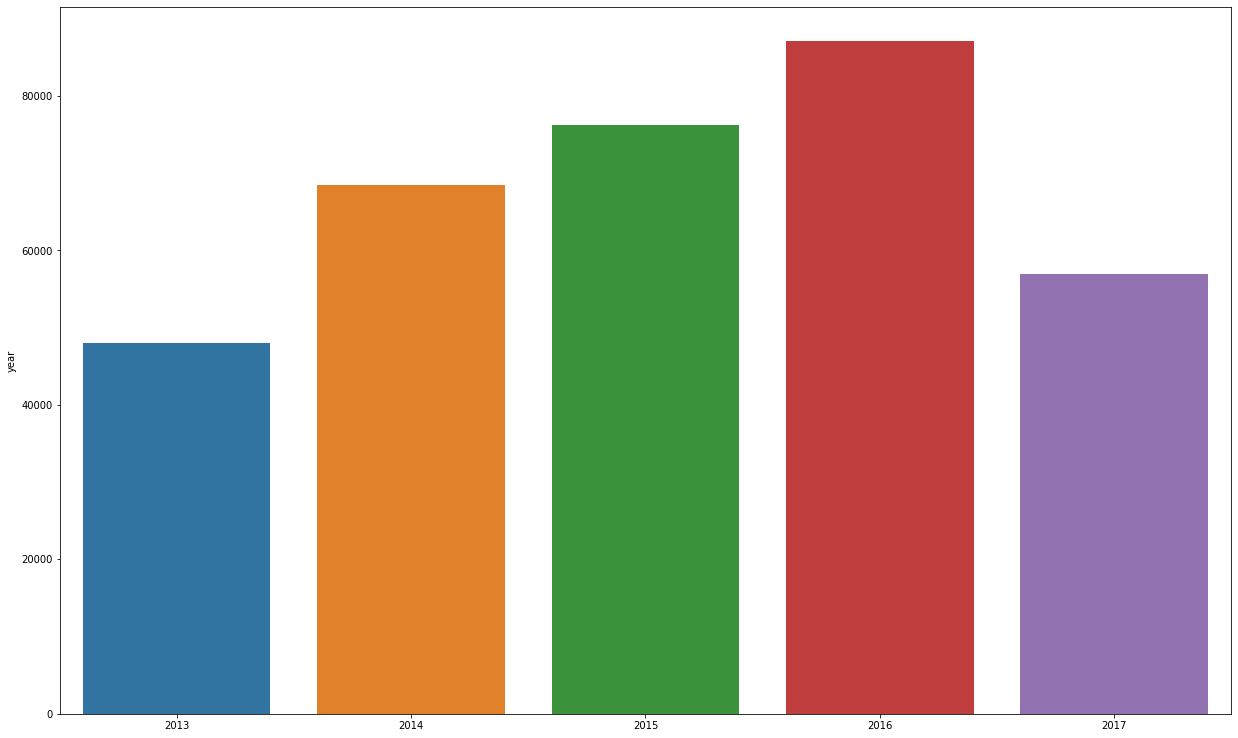

In [68]:
sns.barplot(temp['year'].value_counts().index, temp['year'].value_counts())

<AxesSubplot:>

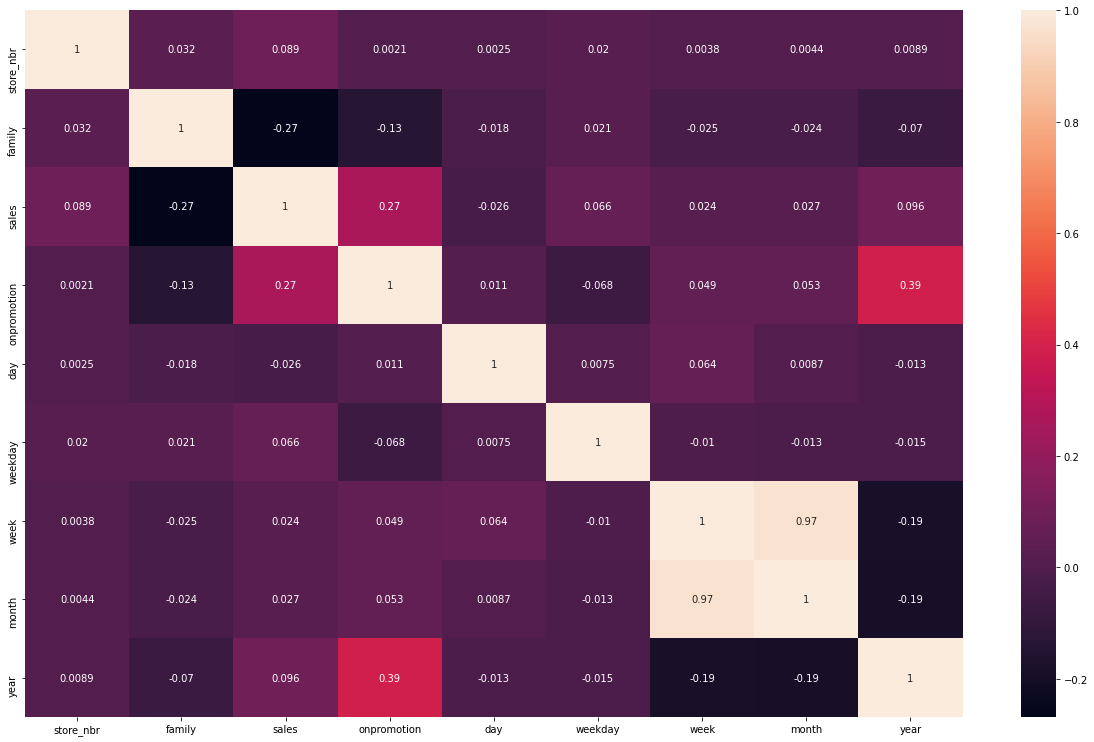

In [69]:
sns.heatmap(temp.corr(),annot=True)

<AxesSubplot:>

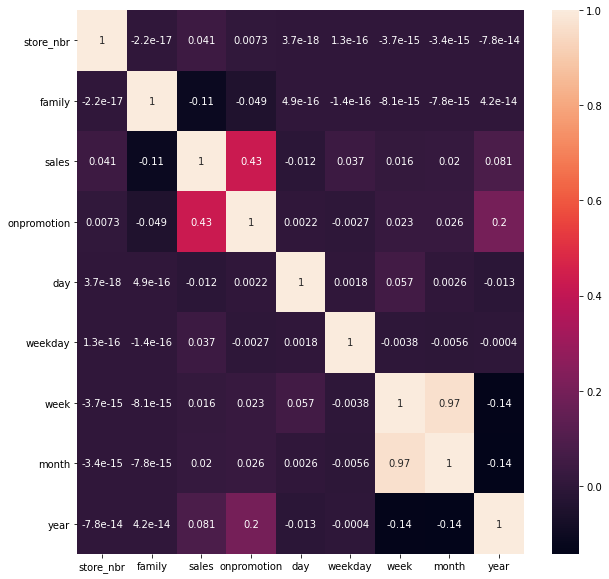

In [70]:
rcParams['figure.figsize'] = 10,10
sns.heatmap(train.corr(), annot=True)

In [71]:
from scipy.stats import spearmanr

In [72]:
spearmanr(temp[['sales','onpromotion']])

SpearmanrResult(correlation=0.2763912765877456, pvalue=0.0)

In [73]:
spearmanr(train[['sales','onpromotion']])

SpearmanrResult(correlation=0.5380218163559245, pvalue=0.0)

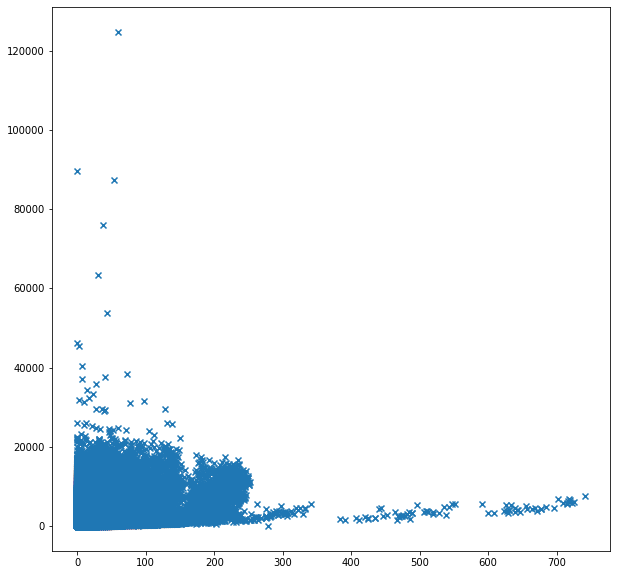

In [74]:
plt.scatter(train['onpromotion'],train['sales'],marker='x')

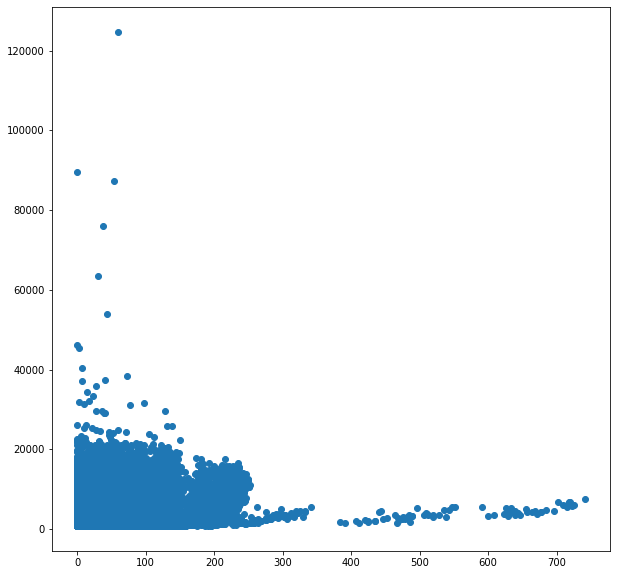

In [75]:
plt.scatter(temp['onpromotion'], temp['sales'], marker='o')

In [76]:
train[train['onpromotion'] > 600]

,date,store_nbr,family,sales,onpromotion,day,weekday,week,month,year
2158550,2016-04-29,53,10,3420.000,609,29,4,17,4,2016
2160332,2016-04-30,53,10,5948.000,710,30,5,17,4,2016
2162113,2016-05-01,53,10,6712.000,718,1,6,17,5,2016
2163896,2016-05-02,53,10,4643.000,639,2,0,18,5,2016
2165677,2016-05-03,53,10,4096.000,630,3,1,18,5,2016
2167459,2016-05-04,53,10,5109.000,655,4,2,18,5,2016
2169240,2016-05-05,53,10,5393.000,633,5,3,18,5,2016
2171023,2016-05-06,53,10,4136.000,644,6,4,18,5,2016
2172805,2016-05-07,53,10,6825.000,702,7,5,18,5,2016
2174587,2016-05-08,53,10,4521.000,668,8,6,18,5,2016


In [77]:
family_dict

{'BOOKS': 1,
 'PERSONAL CARE': 2,
 'PREPARED FOODS': 3,
 'FROZEN FOODS': 4,
 'BREAD/BAKERY': 5,
 'GROCERY II': 6,
 'PRODUCE': 7,
 'PET SUPPLIES': 8,
 'LADIESWEAR': 9,
 'GROCERY I': 10,
 'LINGERIE': 11,
 'DAIRY': 12,
 'MAGAZINES': 13,
 'LAWN AND GARDEN': 14,
 'BEVERAGES': 15,
 'HARDWARE': 16,
 'POULTRY': 17,
 'CELEBRATION': 18,
 'SCHOOL AND OFFICE SUPPLIES': 19,
 'HOME AND KITCHEN I': 20,
 'PLAYERS AND ELECTRONICS': 21,
 'HOME APPLIANCES': 22,
 'HOME CARE': 23,
 'AUTOMOTIVE': 24,
 'BABY CARE': 25,
 'SEAFOOD': 26,
 'CLEANING': 27,
 'DELI': 28,
 'EGGS': 29,
 'HOME AND KITCHEN II': 30,
 'BEAUTY': 31,
 'MEATS': 32,
 'LIQUOR,WINE,BEER': 33}

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='family'>

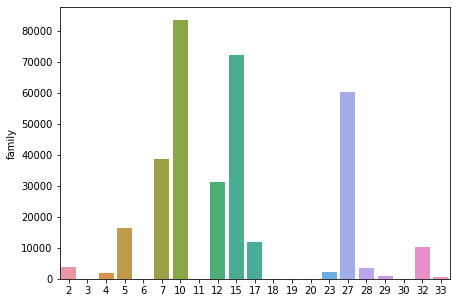

In [78]:
#rcParams['figure.figsize'] = 21,13
rcParams['figure.figsize'] = 7,5
sns.barplot(temp['family'].value_counts().index, temp['family'].value_counts())

In [79]:
family_dict

{'BOOKS': 1,
 'PERSONAL CARE': 2,
 'PREPARED FOODS': 3,
 'FROZEN FOODS': 4,
 'BREAD/BAKERY': 5,
 'GROCERY II': 6,
 'PRODUCE': 7,
 'PET SUPPLIES': 8,
 'LADIESWEAR': 9,
 'GROCERY I': 10,
 'LINGERIE': 11,
 'DAIRY': 12,
 'MAGAZINES': 13,
 'LAWN AND GARDEN': 14,
 'BEVERAGES': 15,
 'HARDWARE': 16,
 'POULTRY': 17,
 'CELEBRATION': 18,
 'SCHOOL AND OFFICE SUPPLIES': 19,
 'HOME AND KITCHEN I': 20,
 'PLAYERS AND ELECTRONICS': 21,
 'HOME APPLIANCES': 22,
 'HOME CARE': 23,
 'AUTOMOTIVE': 24,
 'BABY CARE': 25,
 'SEAFOOD': 26,
 'CLEANING': 27,
 'DELI': 28,
 'EGGS': 29,
 'HOME AND KITCHEN II': 30,
 'BEAUTY': 31,
 'MEATS': 32,
 'LIQUOR,WINE,BEER': 33}

In [80]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [81]:
oil.index = range(len(oil))
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [82]:
oil['lin_interp'] = oil['dcoilwtico'].interpolate(method='linear')

In [83]:
train.sort_values(by=['date','store_nbr','family'], ascending=True, inplace=True, ignore_index=True)

In [84]:
data = pd.merge(left=train, right=oil[['date','lin_interp']], how='left', on='date')
data

,date,store_nbr,family,sales,onpromotion,day,weekday,week,month,year,lin_interp
0,2013-01-01,1,1,0.000,0,1,1,1,1,2013,NaN
1,2013-01-01,1,2,0.000,0,1,1,1,1,2013,NaN
2,2013-01-01,1,3,0.000,0,1,1,1,1,2013,NaN
3,2013-01-01,1,4,0.000,0,1,1,1,1,2013,NaN
4,2013-01-01,1,5,0.000,0,1,1,1,1,2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,54,29,79.000,1,15,1,33,8,2017,47.57
3000884,2017-08-15,54,30,19.000,0,15,1,33,8,2017,47.57
3000885,2017-08-15,54,31,0.000,0,15,1,33,8,2017,47.57
3000886,2017-08-15,54,32,57.842,0,15,1,33,8,2017,47.57


In [85]:
data = pd.merge(left=data,
         right=stores,
         how='left',
         on='store_nbr')

In [86]:
data

,date,store_nbr,family,sales,onpromotion,day,weekday,week,month,year,lin_interp,city,state,type,cluster
0,2013-01-01,1,1,0.000,0,1,1,1,1,2013,NaN,11,14,4,13
1,2013-01-01,1,2,0.000,0,1,1,1,1,2013,NaN,11,14,4,13
2,2013-01-01,1,3,0.000,0,1,1,1,1,2013,NaN,11,14,4,13
3,2013-01-01,1,4,0.000,0,1,1,1,1,2013,NaN,11,14,4,13
4,2013-01-01,1,5,0.000,0,1,1,1,1,2013,NaN,11,14,4,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,54,29,79.000,1,15,1,33,8,2017,47.57,9,11,3,3
3000884,2017-08-15,54,30,19.000,0,15,1,33,8,2017,47.57,9,11,3,3
3000885,2017-08-15,54,31,0.000,0,15,1,33,8,2017,47.57,9,11,3,3
3000886,2017-08-15,54,32,57.842,0,15,1,33,8,2017,47.57,9,11,3,3


In [87]:
data.sort_values(by=['date','store_nbr','family'],ascending=True,inplace=True,ignore_index=True)

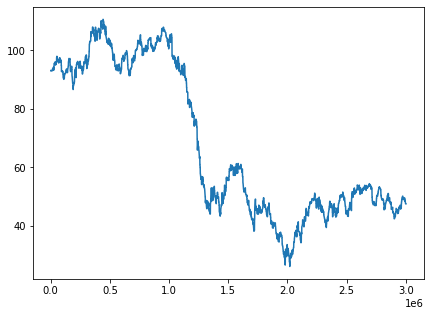

In [88]:
data['lin_interp'] = data['lin_interp'].interpolate(method='linear')
plt.plot(data['lin_interp'])

In [89]:
np.sum(data.isna())

date              0
store_nbr         0
family            0
sales             0
onpromotion       0
day               0
weekday           0
week              0
month             0
year              0
lin_interp     1782
city              0
state             0
type              0
cluster           0
dtype: int64

In [90]:
hol_events

,date,type,locale,locale_name,description,transferred,month
0,2012-03-02,2,1,12,93,False,3
1,2012-04-01,2,3,11,44,False,4
2,2012-04-12,2,1,5,21,False,4
3,2012-04-14,2,1,20,84,False,4
4,2012-04-21,2,1,19,65,False,4
...,...,...,...,...,...,...,...
345,2017-12-22,4,2,15,68,False,12
346,2017-12-23,4,2,15,64,False,12
347,2017-12-24,4,2,15,99,False,12
348,2017-12-25,2,2,15,51,False,12


In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [92]:
oil.index = oil.date

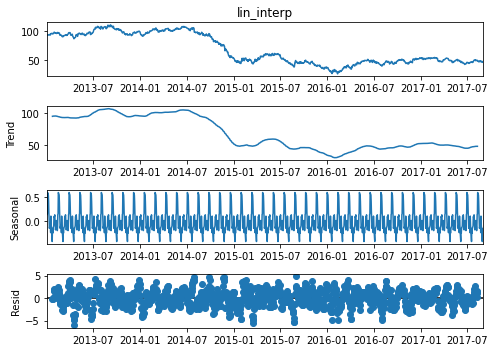

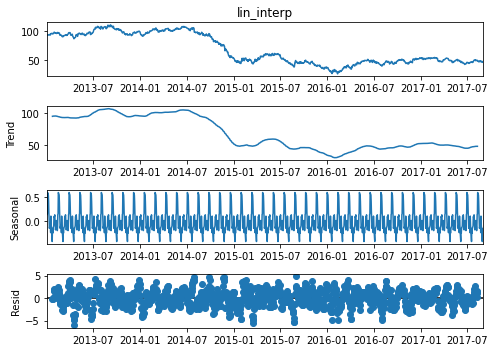

In [93]:
seasonal_decompose(oil['lin_interp'].dropna(),period=30).plot()

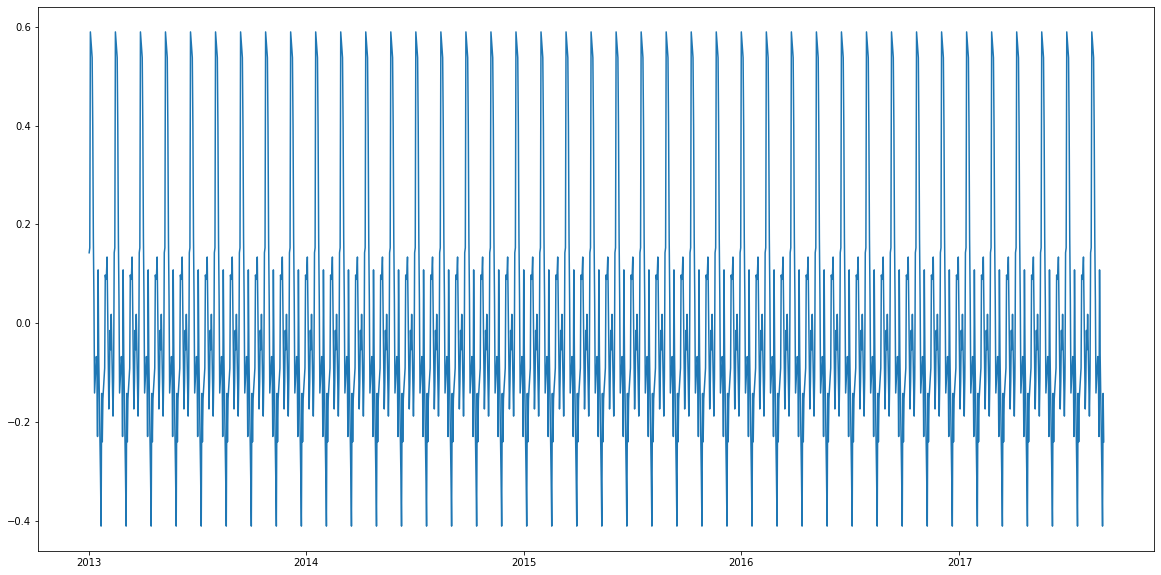

In [94]:
rcParams['figure.figsize'] = 20,10
plt.plot(seasonal_decompose(oil['lin_interp'].dropna(),period=30).seasonal)

In [95]:
oil.index = range(len(oil))

In [96]:
#data.sort_values(by=['date','store_nbr'], ascending=True, inplace=True, ignore_index=True)

In [97]:
from tsfresh.feature_extraction import feature_calculators

In [98]:
data

,date,store_nbr,family,sales,onpromotion,day,weekday,week,month,year,lin_interp,city,state,type,cluster
0,2013-01-01,1,1,0.000,0,1,1,1,1,2013,NaN,11,14,4,13
1,2013-01-01,1,2,0.000,0,1,1,1,1,2013,NaN,11,14,4,13
2,2013-01-01,1,3,0.000,0,1,1,1,1,2013,NaN,11,14,4,13
3,2013-01-01,1,4,0.000,0,1,1,1,1,2013,NaN,11,14,4,13
4,2013-01-01,1,5,0.000,0,1,1,1,1,2013,NaN,11,14,4,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,54,29,79.000,1,15,1,33,8,2017,47.57,9,11,3,3
3000884,2017-08-15,54,30,19.000,0,15,1,33,8,2017,47.57,9,11,3,3
3000885,2017-08-15,54,31,0.000,0,15,1,33,8,2017,47.57,9,11,3,3
3000886,2017-08-15,54,32,57.842,0,15,1,33,8,2017,47.57,9,11,3,3


In [99]:
feature_calculators.autocorrelation(data['sales'].to_numpy(),2)

0.08398049889743443

In [100]:
from importlib import reload
import main_module as tsm

In [101]:
reload(tsm)

<module 'main_module' from '/home/alexey/notebooks/Kaggle/Store Sales - Time Series Forecasting/main_module.py'>

In [102]:
data, _ = tsm.feature_extractor(data, gcols=['store_nbr','family'], inplace=True, lag={
    'lags' : [1,2]*2 + [1],
    'columns' : ['sales']*2 + ['onpromotion']*2 + ['lin_interp']
})

In [103]:
data

,date,store_nbr,family,sales,onpromotion,day,weekday,week,month,year,lin_interp,city,state,type,cluster,sales_[1],sales_[2],onpromotion_[1],onpromotion_[2],lin_interp_[1]
0,2013-01-01,1,1,0.000,0,1,1,1,1,2013,NaN,11,14,4,13,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,1,2,0.000,0,1,1,1,1,2013,NaN,11,14,4,13,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,1,3,0.000,0,1,1,1,1,2013,NaN,11,14,4,13,NaN,NaN,NaN,NaN,NaN
3,2013-01-01,1,4,0.000,0,1,1,1,1,2013,NaN,11,14,4,13,NaN,NaN,NaN,NaN,NaN
4,2013-01-01,1,5,0.000,0,1,1,1,1,2013,NaN,11,14,4,13,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,54,29,79.000,1,15,1,33,8,2017,47.57,9,11,3,3,113.000,74.000,9.0,1.0,47.59
3000884,2017-08-15,54,30,19.000,0,15,1,33,8,2017,47.57,9,11,3,3,15.000,13.000,0.0,0.0,47.59
3000885,2017-08-15,54,31,0.000,0,15,1,33,8,2017,47.57,9,11,3,3,0.000,0.000,0.0,0.0,47.59
3000886,2017-08-15,54,32,57.842,0,15,1,33,8,2017,47.57,9,11,3,3,64.224,67.435,0.0,0.0,47.59


/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='onpromotion'>

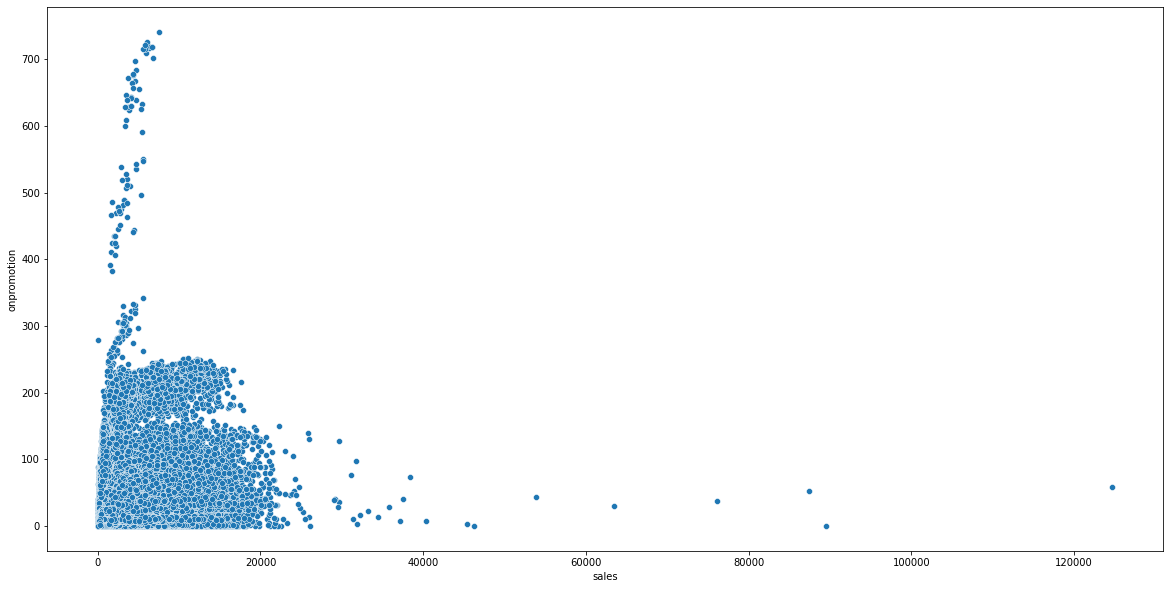

In [104]:
sns.scatterplot(data['sales'],data['onpromotion'])

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='onpromotion'>

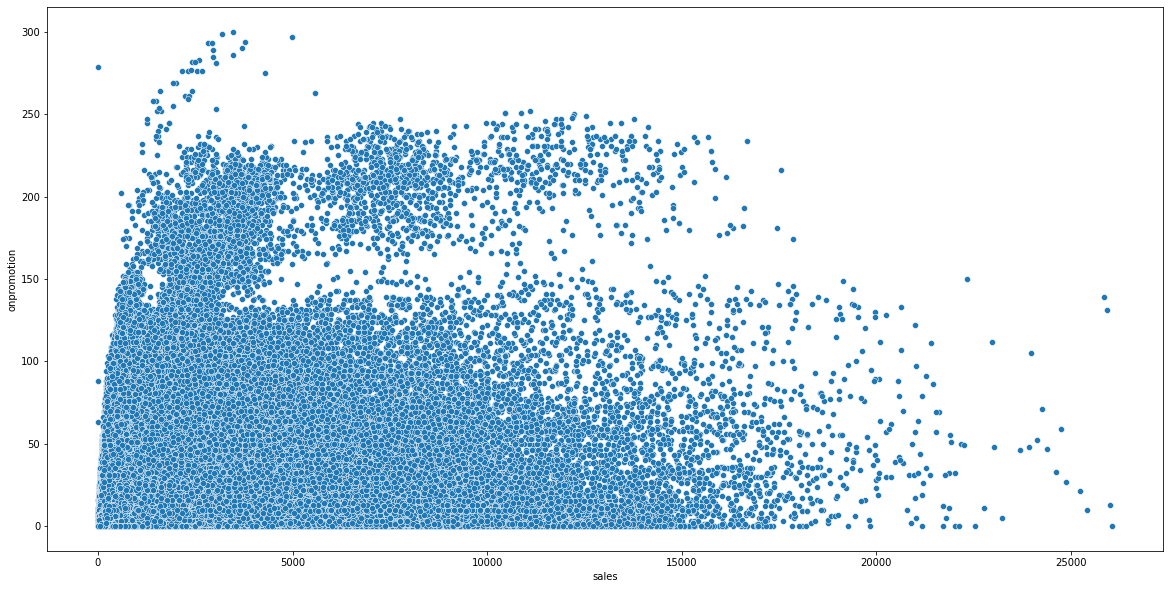

In [105]:
data.drop(data[(data['sales']>28000)|(data['onpromotion']>300)].index,inplace=True)
sns.scatterplot(data['sales'],data['onpromotion'])

In [106]:
hol_events

,date,type,locale,locale_name,description,transferred,month
0,2012-03-02,2,1,12,93,False,3
1,2012-04-01,2,3,11,44,False,4
2,2012-04-12,2,1,5,21,False,4
3,2012-04-14,2,1,20,84,False,4
4,2012-04-21,2,1,19,65,False,4
...,...,...,...,...,...,...,...
345,2017-12-22,4,2,15,68,False,12
346,2017-12-23,4,2,15,64,False,12
347,2017-12-24,4,2,15,99,False,12
348,2017-12-25,2,2,15,51,False,12


/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='sales'>

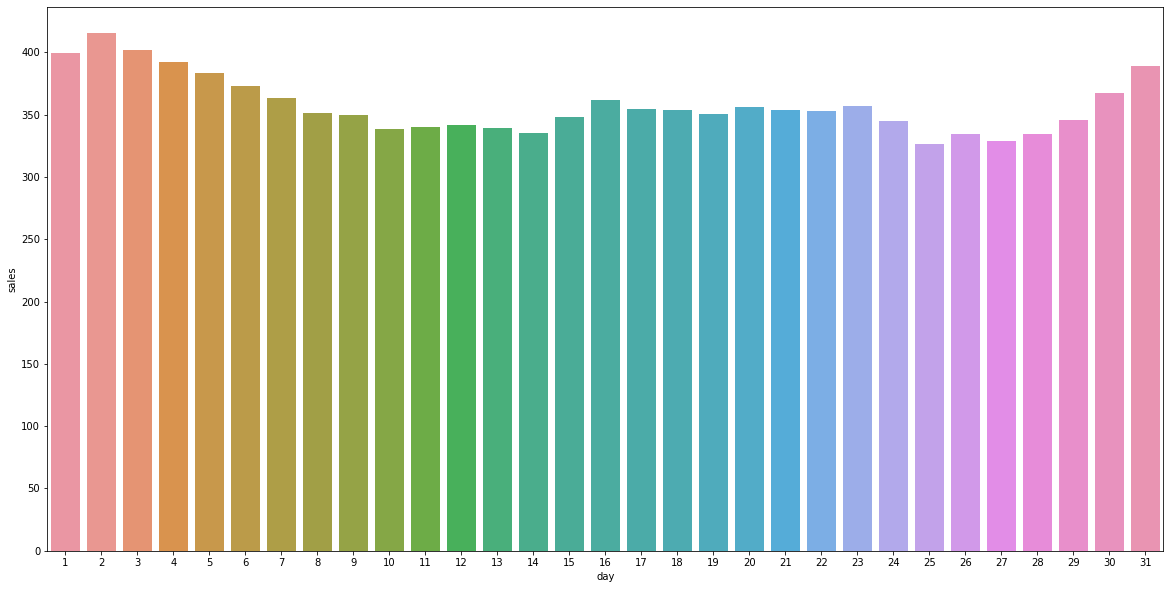

In [107]:
sns.barplot(data.groupby('day')['sales'].mean().index,data.groupby('day')['sales'].mean())

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='sales'>

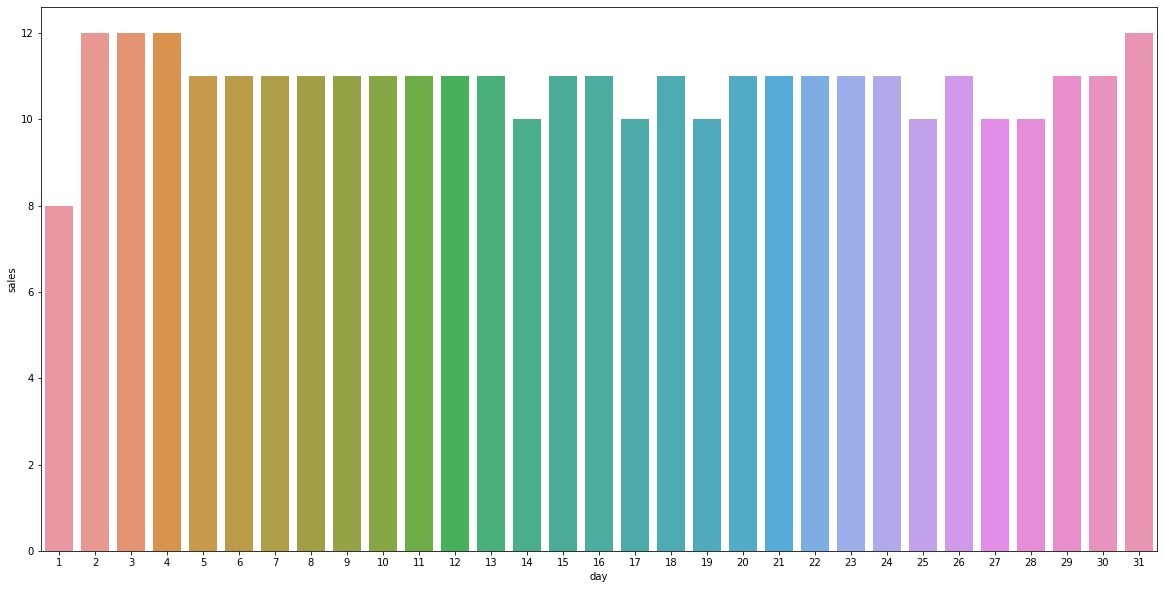

In [108]:
sns.barplot(data.groupby('day')['sales'].median().index, data.groupby('day')['sales'].median())

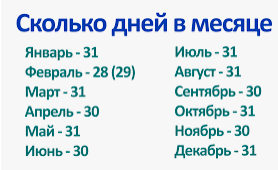

In [109]:
month_dict = {
    'Jan' : 31,
    'Feb' : (28,29),
    'Mar' : 31,
    'Apr' : 30,
    'May' : 31,
    'Jun' : 30,
    'Jul' : 31,
    'Aug' : 31,
    'Sep' : 30,
    'Oct' : 31,
    'Nov' : 30,
    'Dec' : 31
}

In [110]:
#data['wages'] = data.day

In [111]:
month_name = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 
             8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

In [112]:
def get_wages(data, month_name, month_dict):
    temp = data['month'].apply(lambda x : month_name[x])
    for num in month_name:
        if num != 2:
            data.loc[(data['month']==num) & (data['day']==month_dict[month_name[num]]),'wages'] = 1
        else:
            data.loc[(data['month']==2) & (data['year']==2016) & (data['day']==29),'wages'] = 1
            data.loc[(data['month']==2) & (data['year']!=2016) & (data['day']==28),'wages'] = 1

In [113]:
data['wages'] = 0
data

,date,store_nbr,family,sales,onpromotion,day,weekday,week,month,year,...,city,state,type,cluster,sales_[1],sales_[2],onpromotion_[1],onpromotion_[2],lin_interp_[1],wages
0,2013-01-01,1,1,0.000,0,1,1,1,1,2013,...,11,14,4,13,NaN,NaN,NaN,NaN,NaN,0
1,2013-01-01,1,2,0.000,0,1,1,1,1,2013,...,11,14,4,13,NaN,NaN,NaN,NaN,NaN,0
2,2013-01-01,1,3,0.000,0,1,1,1,1,2013,...,11,14,4,13,NaN,NaN,NaN,NaN,NaN,0
3,2013-01-01,1,4,0.000,0,1,1,1,1,2013,...,11,14,4,13,NaN,NaN,NaN,NaN,NaN,0
4,2013-01-01,1,5,0.000,0,1,1,1,1,2013,...,11,14,4,13,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,54,29,79.000,1,15,1,33,8,2017,...,9,11,3,3,113.000,74.000,9.0,1.0,47.59,0
3000884,2017-08-15,54,30,19.000,0,15,1,33,8,2017,...,9,11,3,3,15.000,13.000,0.0,0.0,47.59,0
3000885,2017-08-15,54,31,0.000,0,15,1,33,8,2017,...,9,11,3,3,0.000,0.000,0.0,0.0,47.59,0
3000886,2017-08-15,54,32,57.842,0,15,1,33,8,2017,...,9,11,3,3,64.224,67.435,0.0,0.0,47.59,0


In [114]:
get_wages(data,month_name, month_dict)
data

,date,store_nbr,family,sales,onpromotion,day,weekday,week,month,year,...,city,state,type,cluster,sales_[1],sales_[2],onpromotion_[1],onpromotion_[2],lin_interp_[1],wages
0,2013-01-01,1,1,0.000,0,1,1,1,1,2013,...,11,14,4,13,NaN,NaN,NaN,NaN,NaN,0
1,2013-01-01,1,2,0.000,0,1,1,1,1,2013,...,11,14,4,13,NaN,NaN,NaN,NaN,NaN,0
2,2013-01-01,1,3,0.000,0,1,1,1,1,2013,...,11,14,4,13,NaN,NaN,NaN,NaN,NaN,0
3,2013-01-01,1,4,0.000,0,1,1,1,1,2013,...,11,14,4,13,NaN,NaN,NaN,NaN,NaN,0
4,2013-01-01,1,5,0.000,0,1,1,1,1,2013,...,11,14,4,13,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,54,29,79.000,1,15,1,33,8,2017,...,9,11,3,3,113.000,74.000,9.0,1.0,47.59,0
3000884,2017-08-15,54,30,19.000,0,15,1,33,8,2017,...,9,11,3,3,15.000,13.000,0.0,0.0,47.59,0
3000885,2017-08-15,54,31,0.000,0,15,1,33,8,2017,...,9,11,3,3,0.000,0.000,0.0,0.0,47.59,0
3000886,2017-08-15,54,32,57.842,0,15,1,33,8,2017,...,9,11,3,3,64.224,67.435,0.0,0.0,47.59,0


In [115]:
data

,date,store_nbr,family,sales,onpromotion,day,weekday,week,month,year,...,city,state,type,cluster,sales_[1],sales_[2],onpromotion_[1],onpromotion_[2],lin_interp_[1],wages
0,2013-01-01,1,1,0.000,0,1,1,1,1,2013,...,11,14,4,13,NaN,NaN,NaN,NaN,NaN,0
1,2013-01-01,1,2,0.000,0,1,1,1,1,2013,...,11,14,4,13,NaN,NaN,NaN,NaN,NaN,0
2,2013-01-01,1,3,0.000,0,1,1,1,1,2013,...,11,14,4,13,NaN,NaN,NaN,NaN,NaN,0
3,2013-01-01,1,4,0.000,0,1,1,1,1,2013,...,11,14,4,13,NaN,NaN,NaN,NaN,NaN,0
4,2013-01-01,1,5,0.000,0,1,1,1,1,2013,...,11,14,4,13,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,54,29,79.000,1,15,1,33,8,2017,...,9,11,3,3,113.000,74.000,9.0,1.0,47.59,0
3000884,2017-08-15,54,30,19.000,0,15,1,33,8,2017,...,9,11,3,3,15.000,13.000,0.0,0.0,47.59,0
3000885,2017-08-15,54,31,0.000,0,15,1,33,8,2017,...,9,11,3,3,0.000,0.000,0.0,0.0,47.59,0
3000886,2017-08-15,54,32,57.842,0,15,1,33,8,2017,...,9,11,3,3,64.224,67.435,0.0,0.0,47.59,0


In [117]:
from statsmodels.regression.quantile_regression import QuantReg

<AxesSubplot:>

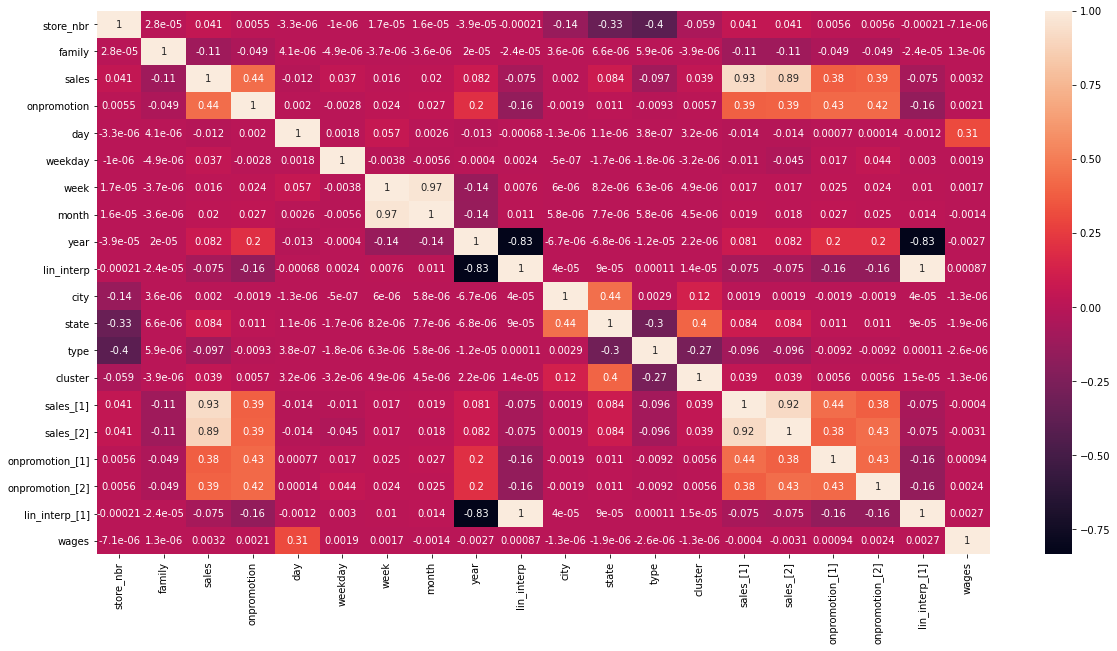

In [118]:
sns.heatmap(data.corr(),annot=True)

In [119]:
temp = data.dropna()
data.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'day', 'weekday',
       'week', 'month', 'year', 'lin_interp', 'city', 'state', 'type',
       'cluster', 'sales_[1]', 'sales_[2]', 'onpromotion_[1]',
       'onpromotion_[2]', 'lin_interp_[1]', 'wages'],
      dtype='object')

In [120]:
X = temp[['store_nbr', 'family', 'day', 'weekday',
       'month', 'city', 'state', 'type',
       'cluster', 'sales_[1]', 'onpromotion_[1]', 'lin_interp_[1]', 'wages']].to_numpy()
y = temp['sales'].to_numpy()
y.shape = (len(y),1)

<AxesSubplot:>

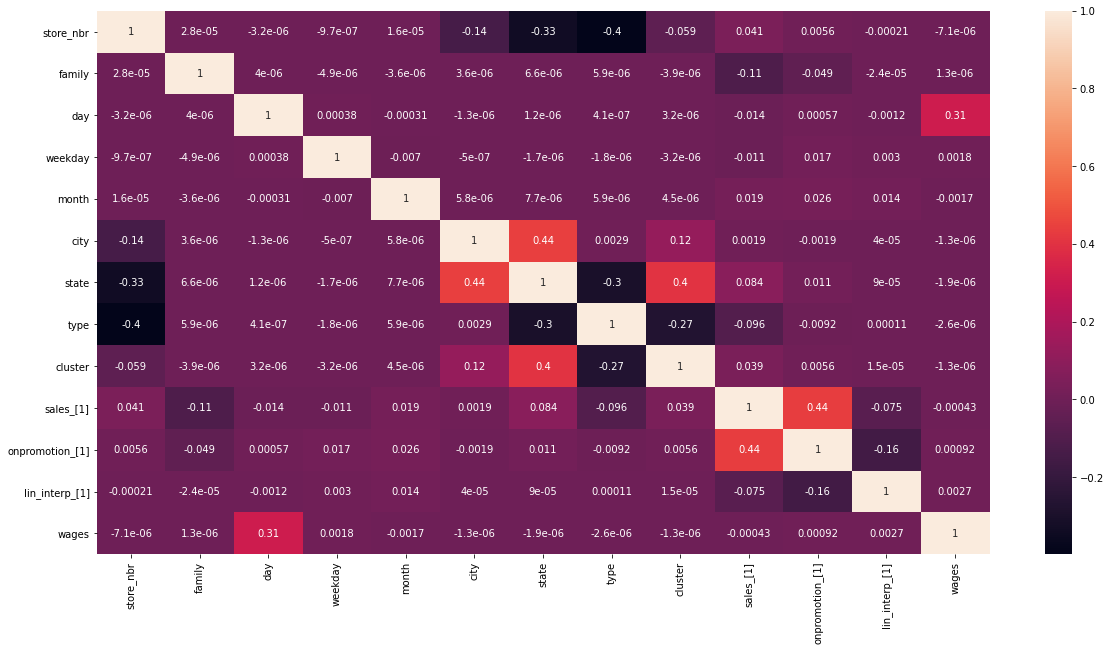

In [121]:
sns.heatmap(temp[['store_nbr', 'family', 'day', 'weekday',
       'month', 'city', 'state', 'type',
       'cluster', 'sales_[1]', 'onpromotion_[1]', 'lin_interp_[1]', 'wages']].corr(), annot=True)

In [122]:
from sklearn.linear_model import Ridge

In [123]:
ridge = Ridge(
    alpha = 100,
    normalize=True,
    solver='lsqr',
    max_iter=500
)

In [124]:
ridge.fit(X,y)

Ridge(alpha=100, max_iter=500, normalize=True, solver='lsqr')

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


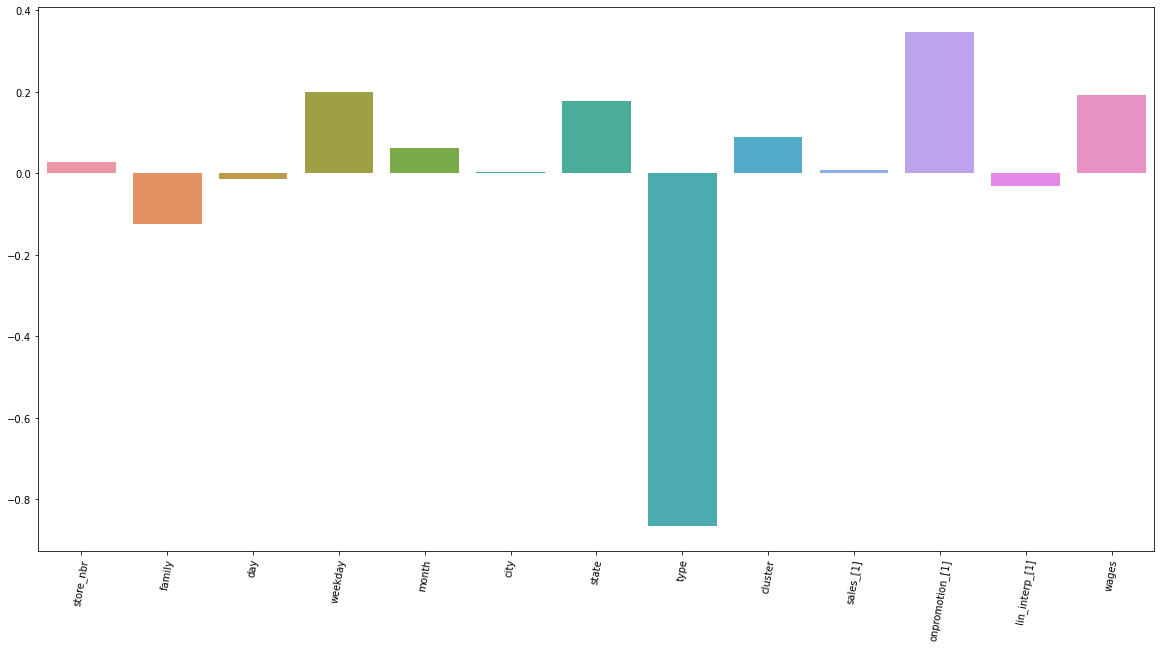

In [125]:
sns.barplot(['store_nbr', 'family', 'day', 'weekday',
       'month', 'city', 'state', 'type',
       'cluster', 'sales_[1]', 'onpromotion_[1]', 'lin_interp_[1]', 'wages'],ridge.coef_[0]) # - week, year
plt.xticks(rotation=80)
plt.show()

In [126]:
tsm.RMSE(y,ridge.predict(X))

1080.9331986691168

In [127]:
tsm.SMAPE(y,ridge.predict(X))

4572425.452148397

In [128]:
from sklearn.linear_model import ElasticNet

In [130]:
e_net = ElasticNet(
    alpha=0.5,
    l1_ratio = 0.5,
    normalize = True
)

In [131]:
e_net.fit(X,y)

ElasticNet(alpha=0.5, normalize=True)

In [137]:
tsm.RMSE(y,np.reshape(e_net.predict(X),y.shape))

1092.1535763659556

In [138]:
tsm.SMAPE(y,np.reshape(e_net.predict(X),y.shape))

4585892.126886618

In [ ]:
QuantReg

In [140]:
from xgboost import XGBRegressor

In [141]:
xgbreg = XGBRegressor(
    n_estimators = 50,
    max_depth=3,
    learning_rate=0.03,
)

In [142]:
xgbreg.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [143]:
y_hat = xgbreg.predict(X)

In [145]:
y_hat.shape = y.shape

In [146]:
tsm.RMSE(y,y_hat)

422.7881946919694

In [147]:
tsm.SMAPE(y,y_hat)

3156371.263558553

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

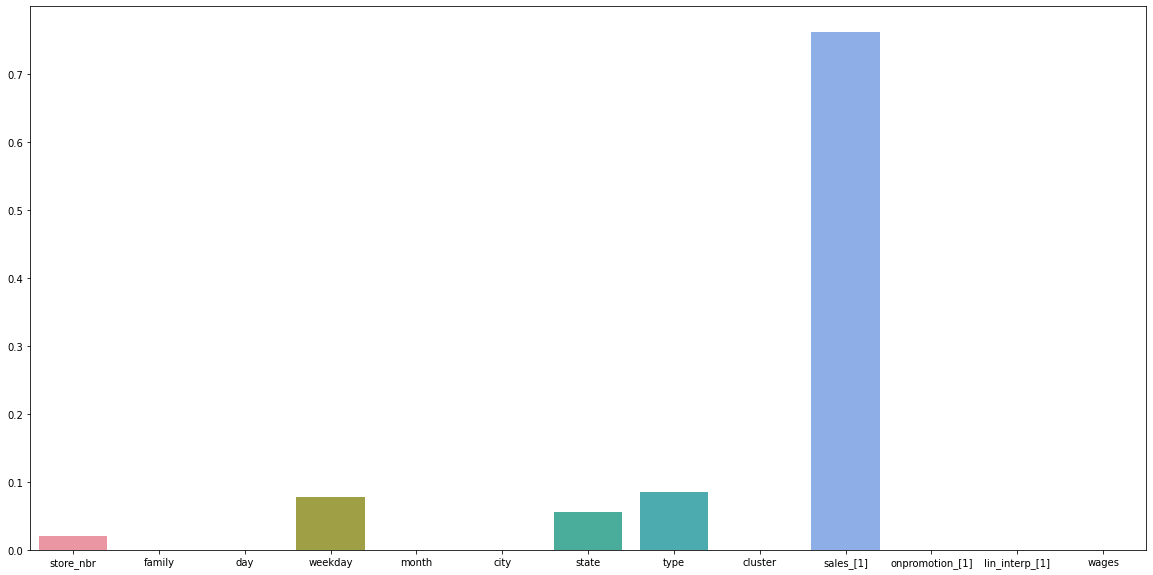

In [149]:
sns.barplot(['store_nbr', 'family', 'day', 'weekday',
       'month', 'city', 'state', 'type',
       'cluster', 'sales_[1]', 'onpromotion_[1]', 'lin_interp_[1]', 'wages'], xgbreg.feature_importances_)